### Imports

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Use Pandas to read and view the first 5 samples in the diabetes prediction dataset
df = pd.read_csv("dataset/diabetes_prediction_dataset.csv")
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
# Get information about the column names, non-null count, and dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Replace 0 with "No" and 1 with "Yes" to indicate if customer purchased Ads or not in the Purchased column
# This is useful for analysis
df["diabetes"] = df["diabetes"].replace({0:"No", 1:"Yes"})
df["hypertension"] = df["hypertension"].replace({0:"No", 1:"Yes"})
df["heart_disease"] = df["heart_disease"].replace({0:"No", 1:"Yes"})


df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,No,Yes,never,25.19,6.6,140,No
1,Female,54.0,No,No,No Info,27.32,6.6,80,No
2,Male,28.0,No,No,never,27.32,5.7,158,No
3,Female,36.0,No,No,current,23.45,5.0,155,No
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,No
5,Female,20.0,No,No,never,27.32,6.6,85,No
6,Female,44.0,No,No,never,19.31,6.5,200,Yes
7,Female,79.0,No,No,No Info,23.86,5.7,85,No
8,Male,42.0,No,No,never,33.64,4.8,145,No
9,Female,32.0,No,No,never,27.32,5.0,100,No


In [5]:
## check dataset dimension
df.shape

(100000, 9)

In [6]:
# Select columns with categorical values
categorical = df.select_dtypes(include="object")
categorical.head()

,gender,hypertension,heart_disease,smoking_history,diabetes
0,Female,No,Yes,never,No
1,Female,No,No,No Info,No
2,Male,No,No,never,No
3,Female,No,No,current,No
4,Male,Yes,Yes,current,No


In [7]:
# Get the statistics of the male and female genders in the dataset
categorical.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [8]:
# Get the statistics of individuals who have hypertension in the dataset
categorical.hypertension.value_counts()

hypertension
No     92515
Yes     7485
Name: count, dtype: int64

In [9]:
# Get the statistics of individuals who have heart_disease in the dataset
categorical.heart_disease.value_counts()

heart_disease
No     96058
Yes     3942
Name: count, dtype: int64

In [10]:
# Get the statistics of the individuals based on smoking history
categorical.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [11]:
# Get the statistics of individuals based on diabetes history
categorical.diabetes.value_counts()

diabetes
No     91500
Yes     8500
Name: count, dtype: int64

In [12]:
categorical.describe().T

,count,unique,top,freq
gender,100000,3,Female,58552
hypertension,100000,2,No,92515
heart_disease,100000,2,No,96058
smoking_history,100000,6,No Info,35816
diabetes,100000,2,No,91500


In [13]:
# Select columns with numerical data
numerical = df.select_dtypes(include=np.number)
numerical.head()

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155


In [14]:
# Get details about the numerical column names, non-null count, and dtypes 
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   bmi                  100000 non-null  float64
 2   HbA1c_level          100000 non-null  float64
 3   blood_glucose_level  100000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.1 MB


In [15]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00


### BMI Analysis

In [16]:
## BMI analysis grouped by gender
df.groupby("gender")["bmi"].mean()

gender
Female    27.449287
Male      27.139108
Other     27.379444
Name: bmi, dtype: float64

In [17]:
## BMI analysis grouped by smoking_history
df.groupby("smoking_history")["bmi"].mean()

smoking_history
No Info        25.343505
current        28.432968
ever           28.761761
former         29.620746
never          28.104621
not current    28.205088
Name: bmi, dtype: float64

In [18]:
## BMI analysis grouped by diabetes status
df.groupby("diabetes")["bmi"].mean()

diabetes
No     26.887163
Yes    31.988382
Name: bmi, dtype: float64

In [19]:
## BMI analysis grouped by Hypertension status
df.groupby("hypertension")["bmi"].mean()

hypertension
No     27.042011
Yes    30.766211
Name: bmi, dtype: float64

In [20]:
## BMI analysis grouped by heart_disease history
df.groupby("heart_disease")["bmi"].mean()

heart_disease
No     27.238489
Yes    29.325700
Name: bmi, dtype: float64

### Blood Glucose Level Analysis

In [21]:
## Blood glucose level grouped by gender
df.groupby("gender")["blood_glucose_level"].mean()

gender
Female    137.468951
Male      138.890031
Other     139.444444
Name: blood_glucose_level, dtype: float64

In [22]:
## Blood glucose level grouped by smoking history
df.groupby("smoking_history")["blood_glucose_level"].mean()

smoking_history
No Info        135.244248
current        139.641719
ever           139.307193
former         143.214713
never          138.748654
not current    139.393671
Name: blood_glucose_level, dtype: float64

In [23]:
## Blood glucose level grouped by diabetes status
df.groupby("diabetes")["blood_glucose_level"].mean()

diabetes
No     132.852470
Yes    194.094706
Name: blood_glucose_level, dtype: float64

In [24]:
## Blood glucose level grouped by Hypertension status
df.groupby("hypertension")["blood_glucose_level"].mean()

hypertension
No     137.080463
Yes    150.141216
Name: blood_glucose_level, dtype: float64

In [25]:
## Blood glucose level grouped by heart diease history
df.groupby("heart_disease")["blood_glucose_level"].mean()

heart_disease
No     137.480262
Yes    152.137747
Name: blood_glucose_level, dtype: float64

### HbA1c_level Analysis

In [26]:
## Mean HbA1c_level by individuals grouped by gender
df.groupby("gender")["HbA1c_level"].mean()

gender
Female    5.509477
Male      5.553041
Other     5.405556
Name: HbA1c_level, dtype: float64

In [27]:
## Mean HbA1c_level by individuals grouped by smoking_history
df.groupby("smoking_history")["HbA1c_level"].mean()

smoking_history
No Info        5.461607
current        5.547997
ever           5.578122
former         5.651861
never          5.543063
not current    5.567597
Name: HbA1c_level, dtype: float64

In [28]:
## Mean HbA1c_level by individuals grouped by diabetes status
df.groupby("diabetes")["HbA1c_level"].mean()

diabetes
No     5.396761
Yes    6.934953
Name: HbA1c_level, dtype: float64

In [29]:
## Mean HbA1c_level by individuals grouped by hypertension status
df.groupby("hypertension")["HbA1c_level"].mean()

hypertension
No     5.502858
Yes    5.832171
Name: HbA1c_level, dtype: float64

In [30]:
## Mean HbA1c_level by individuals grouped by heart disease history
df.groupby("heart_disease")["HbA1c_level"].mean()

heart_disease
No     5.512847
Yes    5.884729
Name: HbA1c_level, dtype: float64

### Age Analysis

In [31]:
## Mean age by individuals grouped by gender
df.groupby("gender")["age"].mean()

gender
Female    42.463291
Male      41.075139
Other     29.555556
Name: age, dtype: float64

In [32]:
## Mean age by individuals grouped by smoking_history
df.groupby("smoking_history")["age"].mean()

smoking_history
No Info        33.538037
current        44.063696
ever           49.136863
former         57.061698
never          43.891491
not current    47.689611
Name: age, dtype: float64

In [33]:
## Mean age by individuals grouped by diabetes status
df.groupby("diabetes")["age"].mean()

diabetes
No     40.115187
Yes    60.946588
Name: age, dtype: float64

In [34]:
## Mean age by individuals grouped by hypertension status
df.groupby("hypertension")["age"].mean()

hypertension
No     40.277194
Yes    61.769005
Name: age, dtype: float64

In [35]:
## Mean age by individuals grouped by heart disease history
df.groupby("heart_disease")["age"].mean()

heart_disease
No     40.821437
Yes    67.823440
Name: age, dtype: float64

### Exploratory Data Analysis

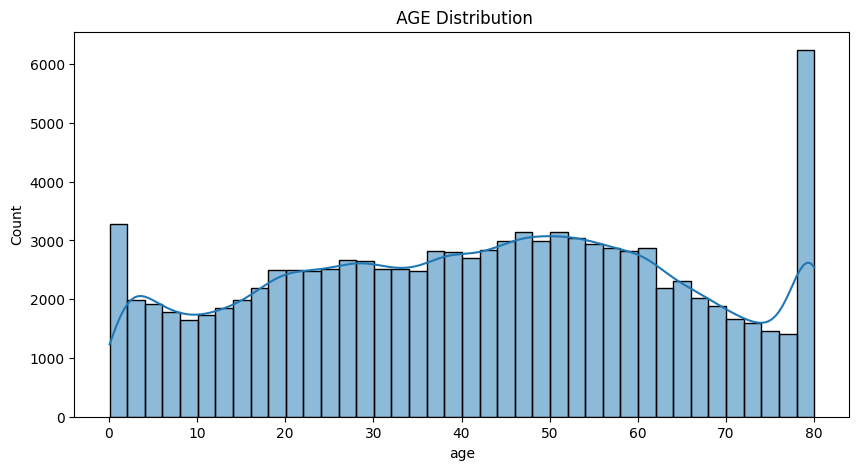

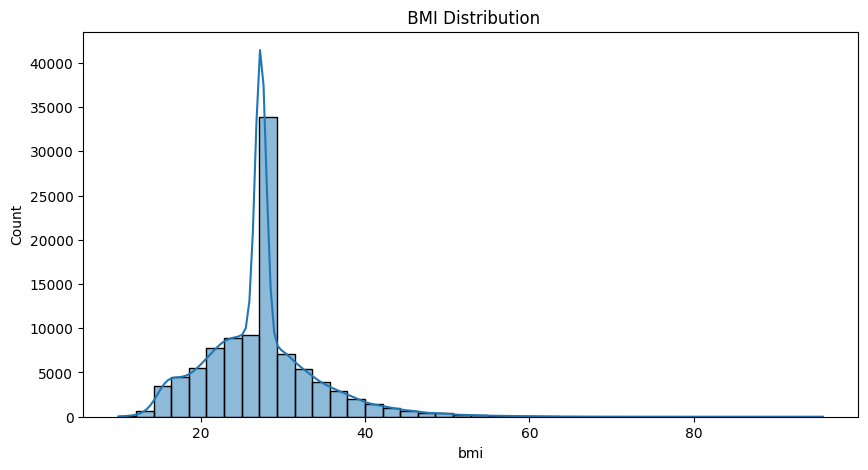

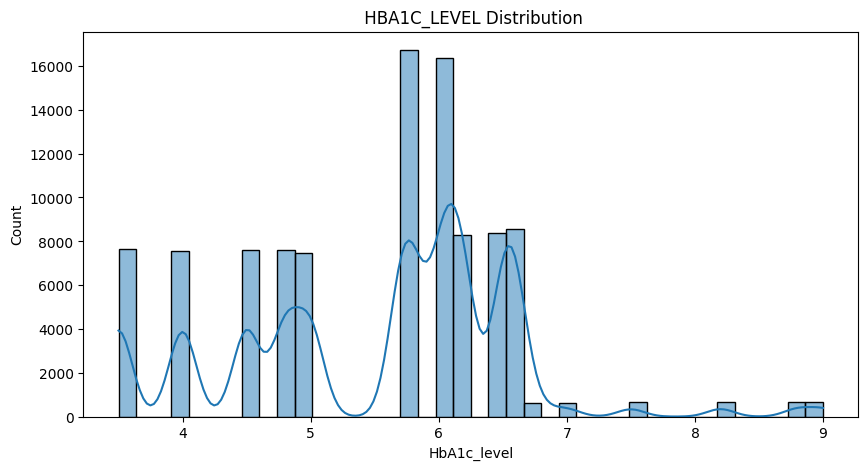

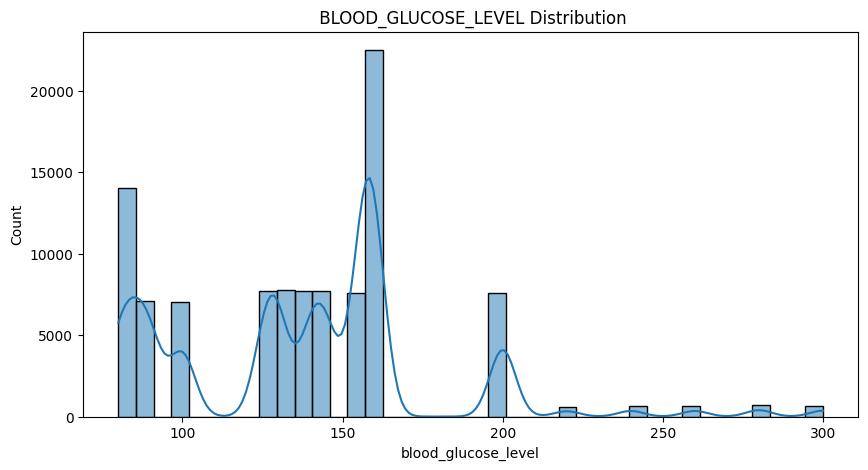

In [36]:
numeric_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(include="object")

for col in numeric_columns:
    
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df[col], bins=40, kde=True)
    plt.title(f" {col.upper()} Distribution")
    plt.show()

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


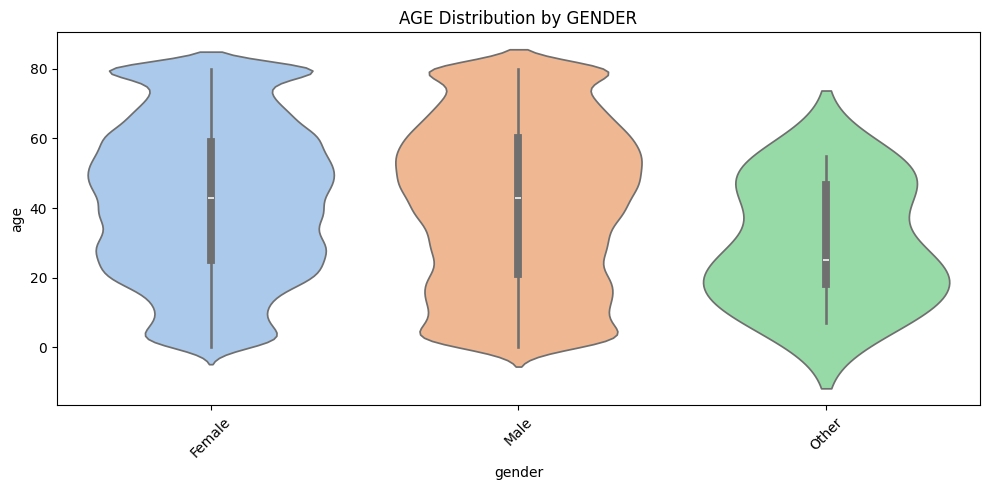

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


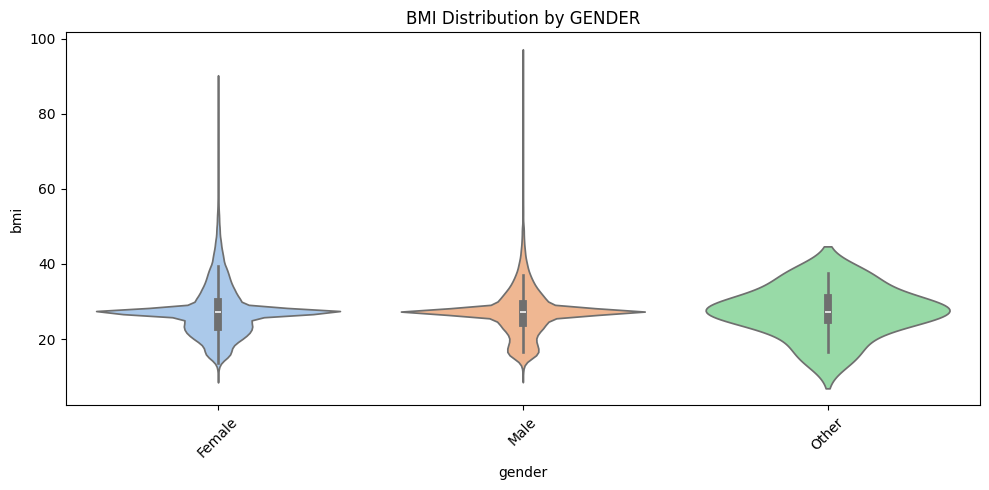

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


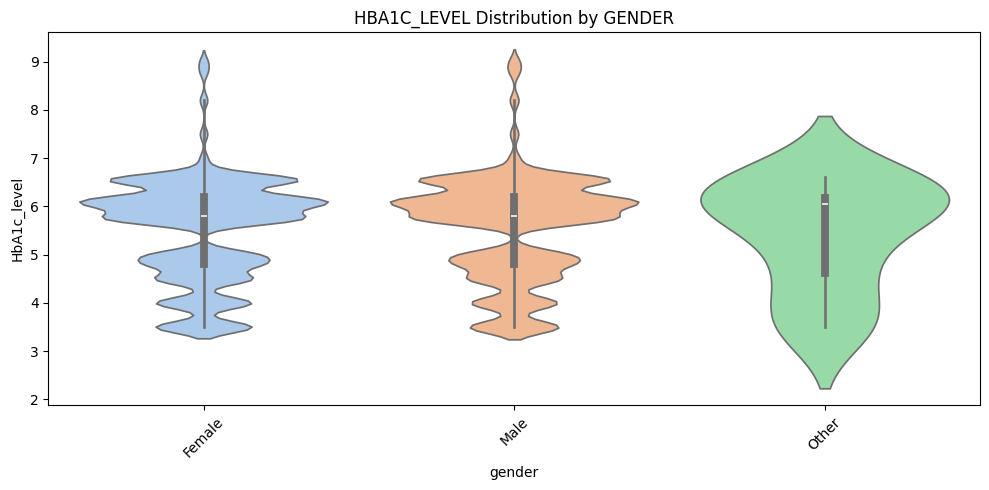

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


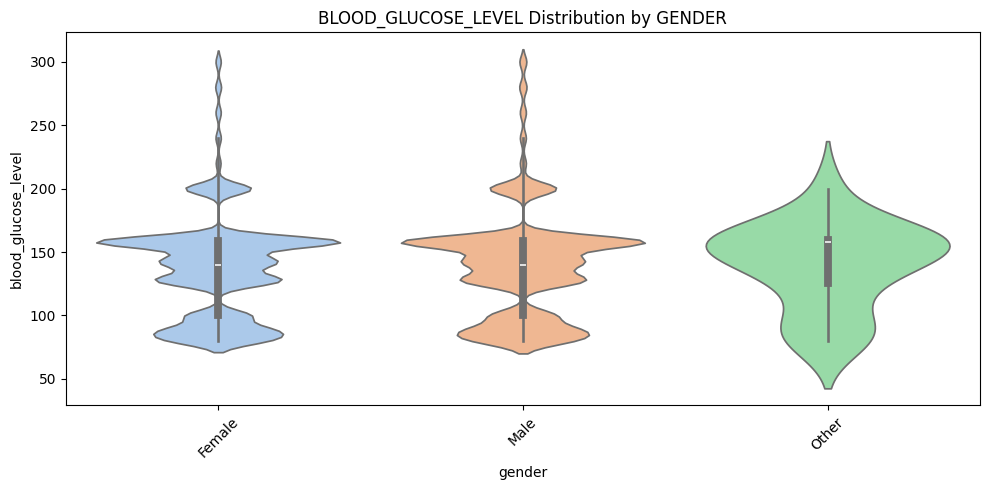

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


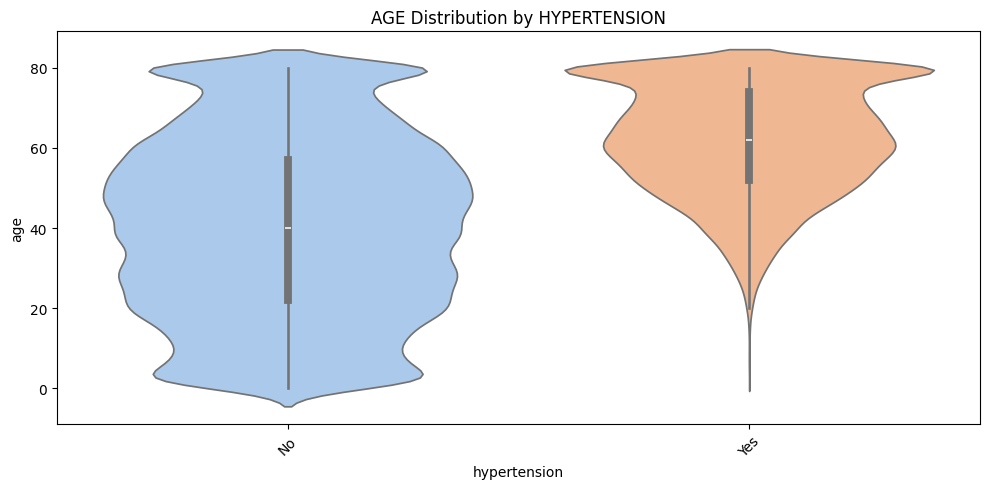

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


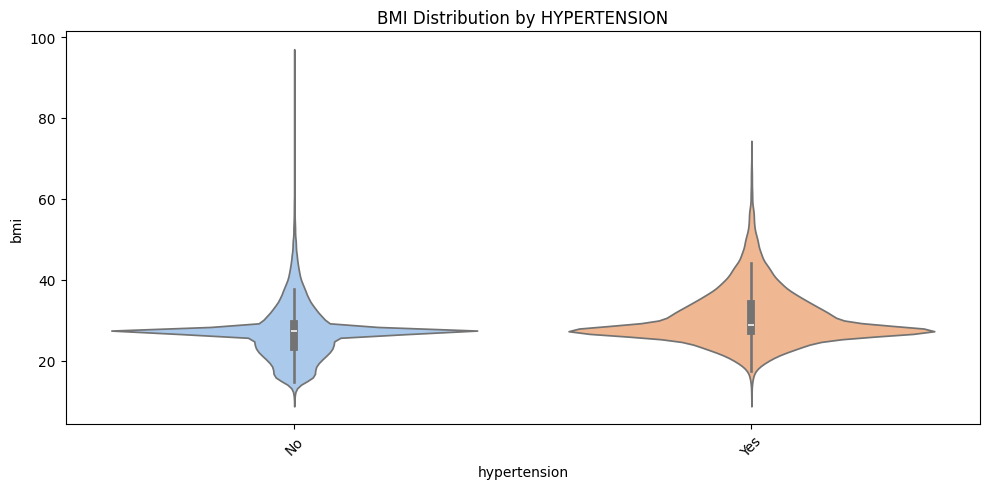

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


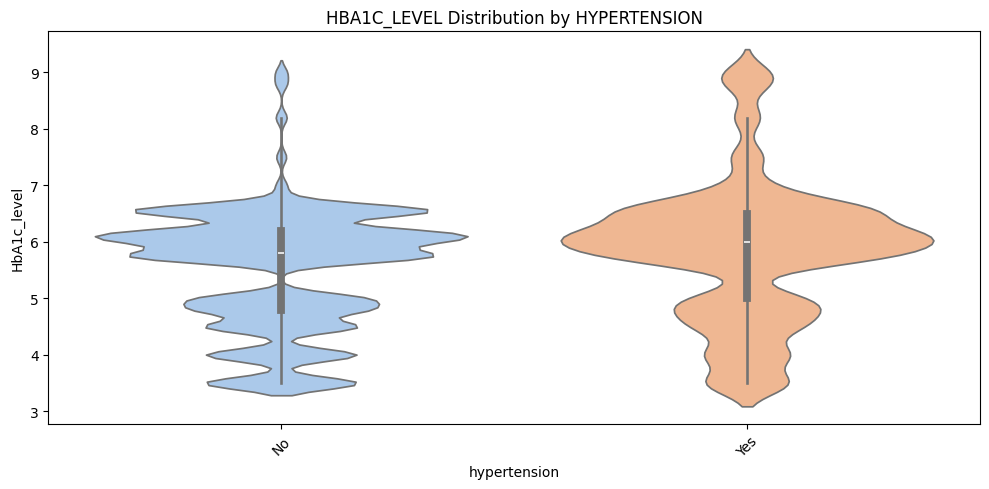

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


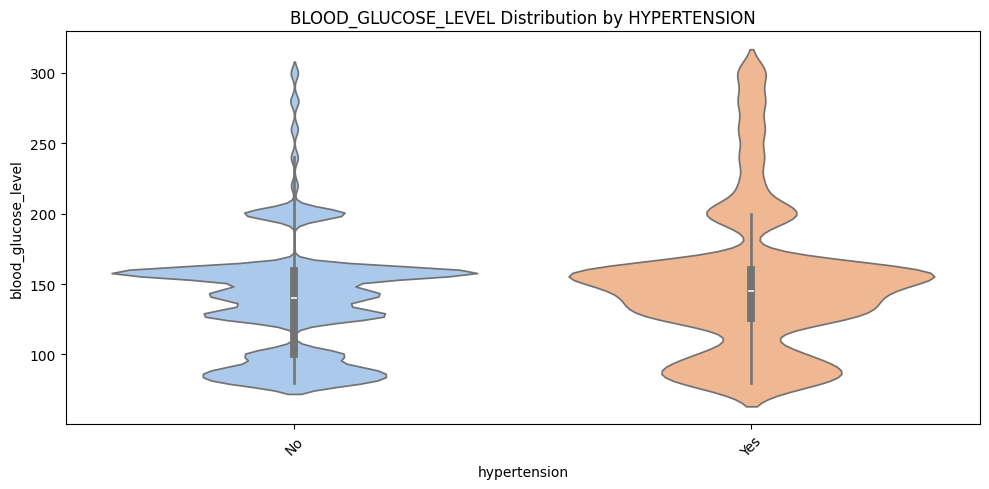

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


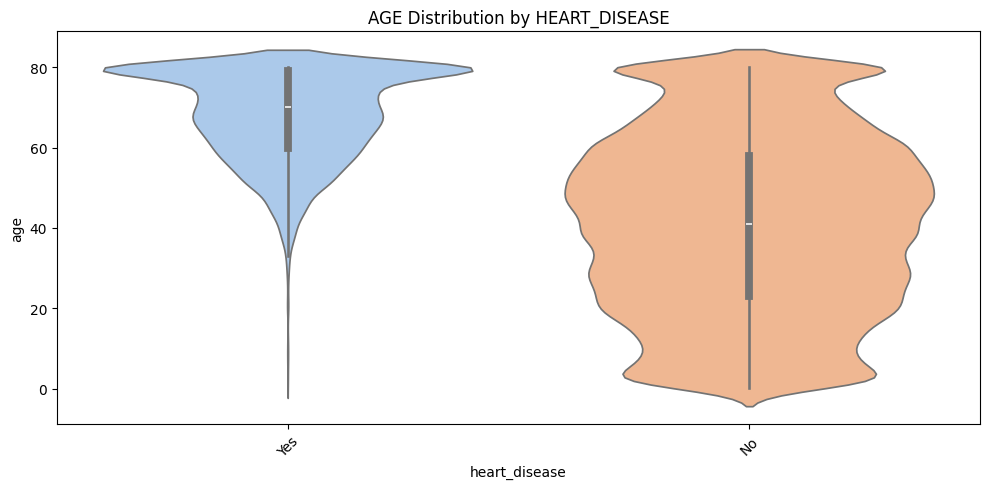

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


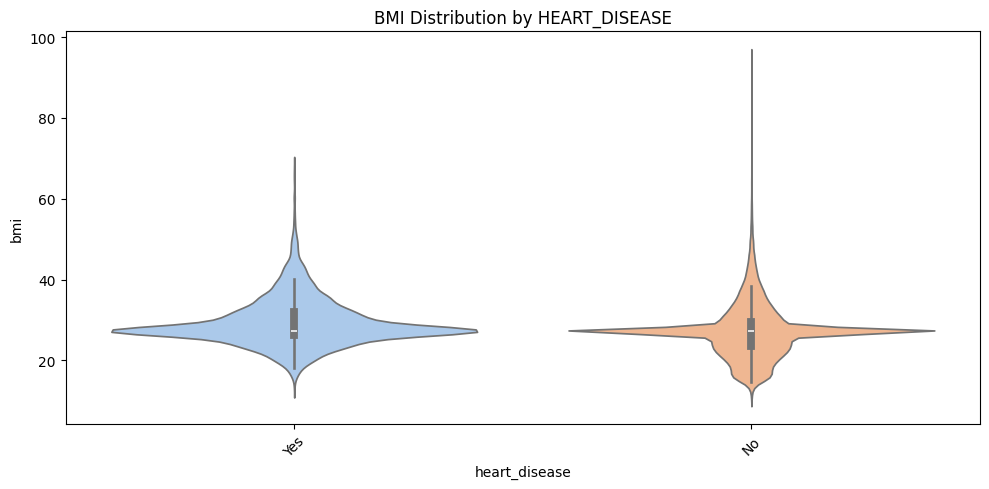

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


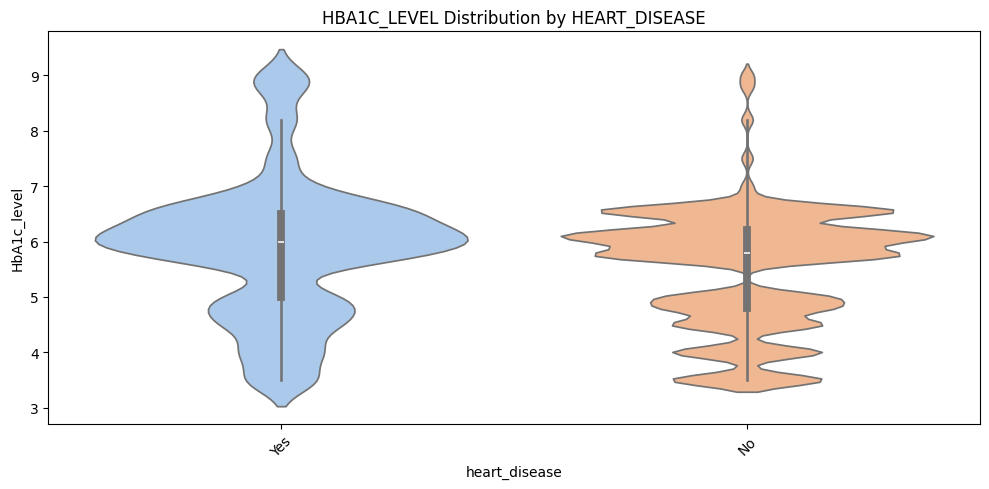

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


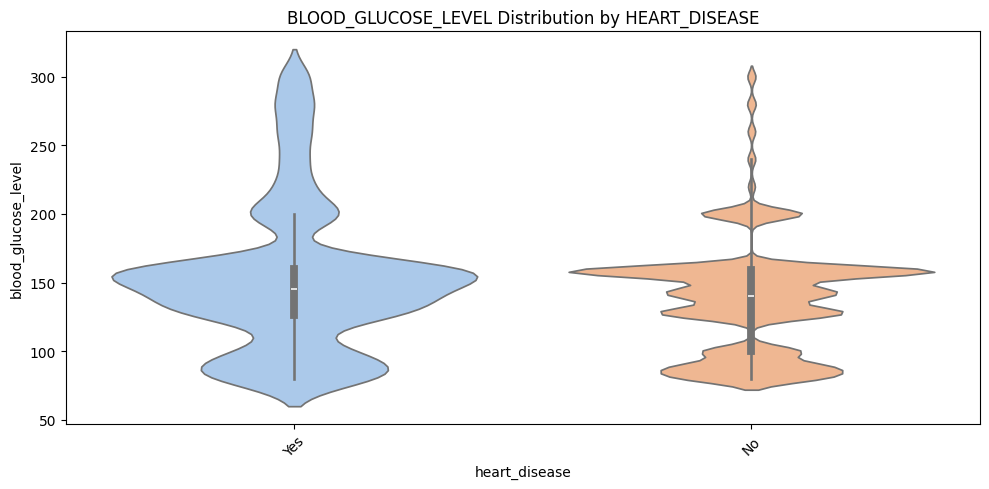

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


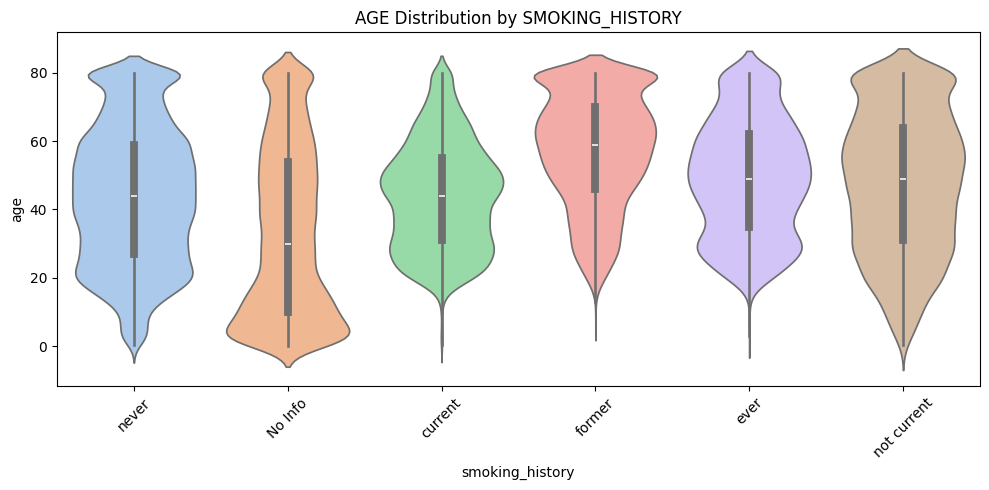

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


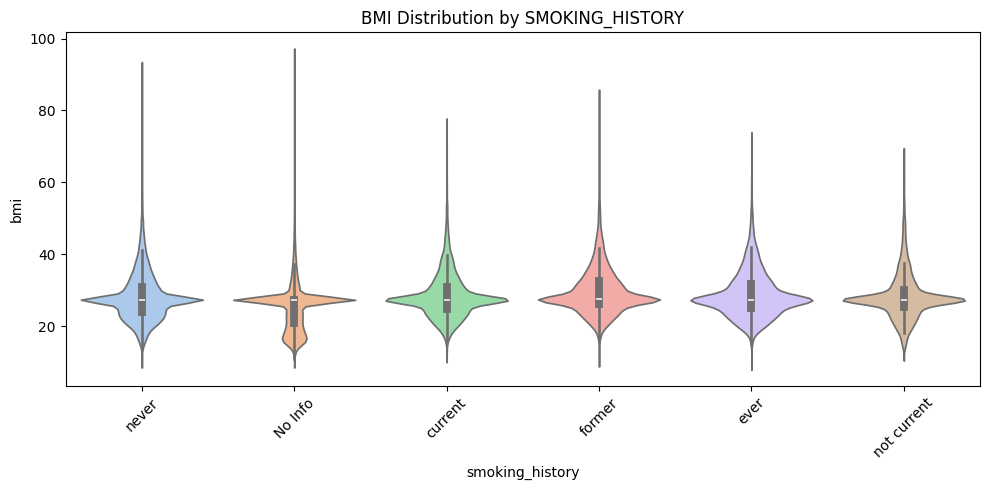

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


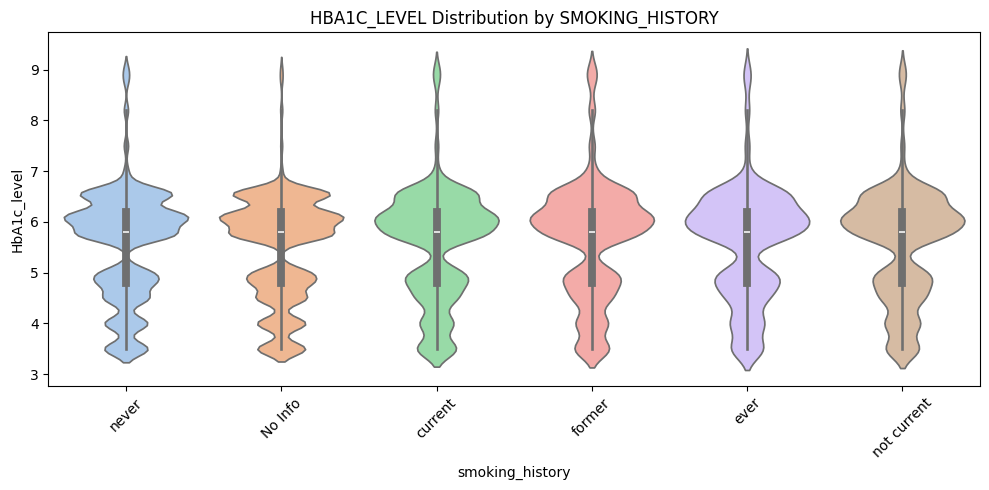

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


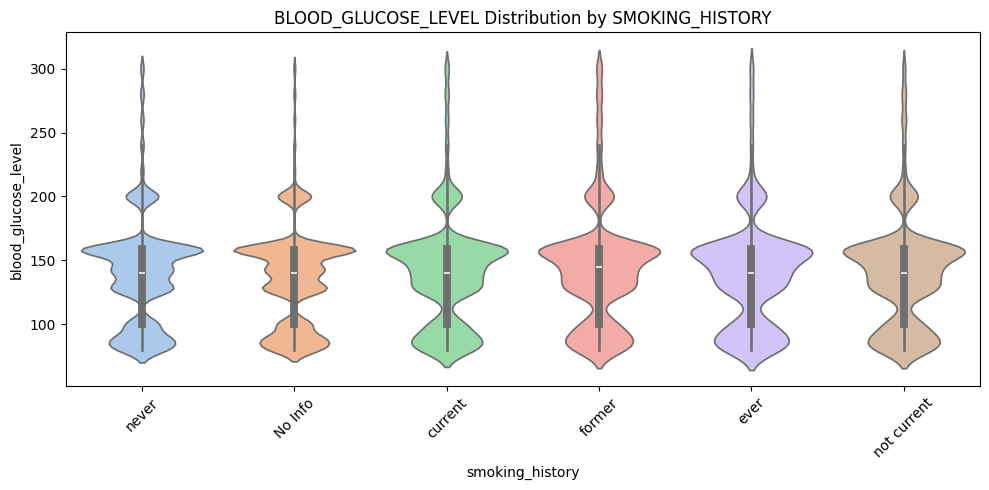

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


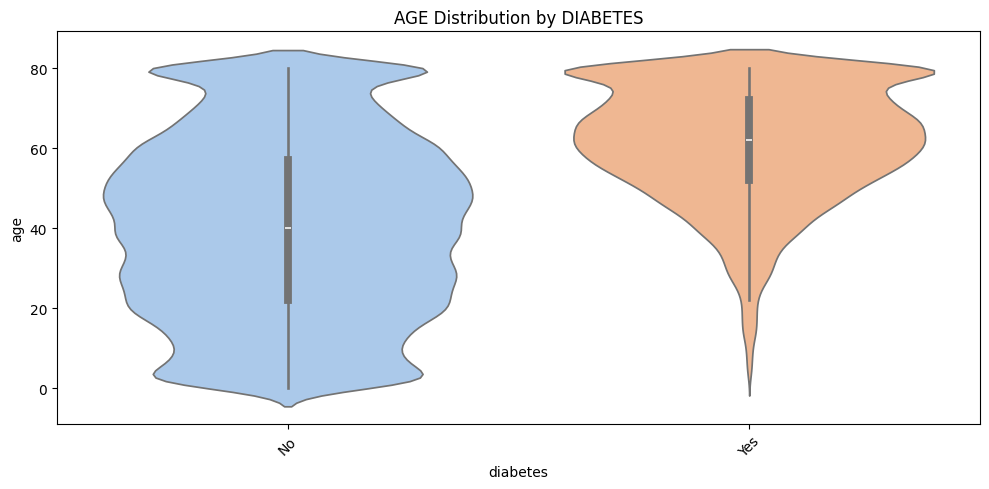

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


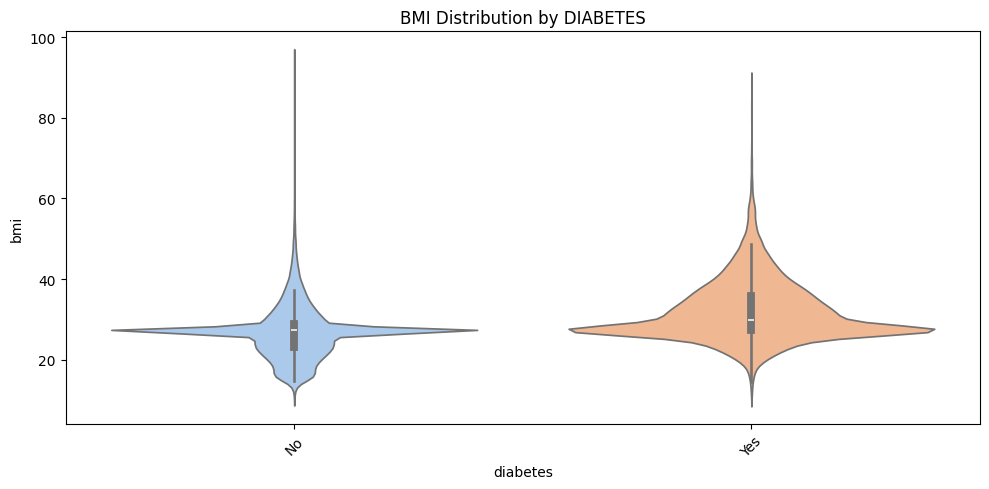

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


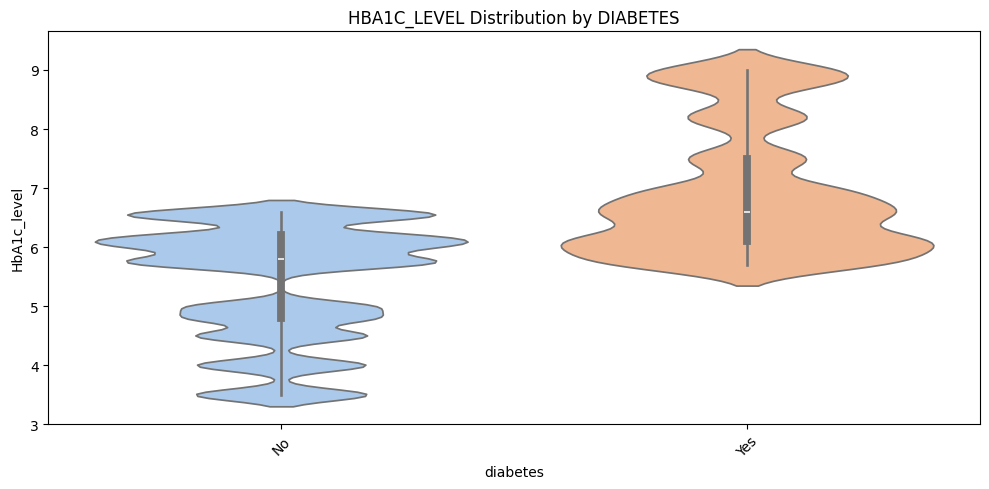

/tmp/ipykernel_68283/3033181171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")


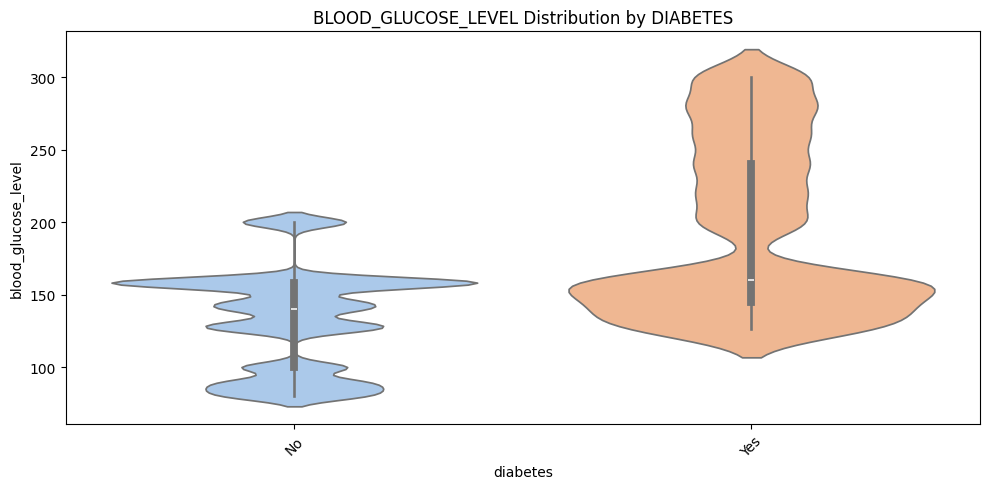

In [37]:
for cat_col in categorical_columns.columns:
    # if cat_col != 'user_id':
    for col in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.violinplot(data=df, x=cat_col, y=col, palette="pastel")
        plt.title(f"{col.upper()} Distribution by {cat_col.upper()}")
        plt.xticks(rotation=45)  # Optional: improves readability
        plt.tight_layout()       # Optional: ensures layout doesn’t cut off labels
        plt.show()


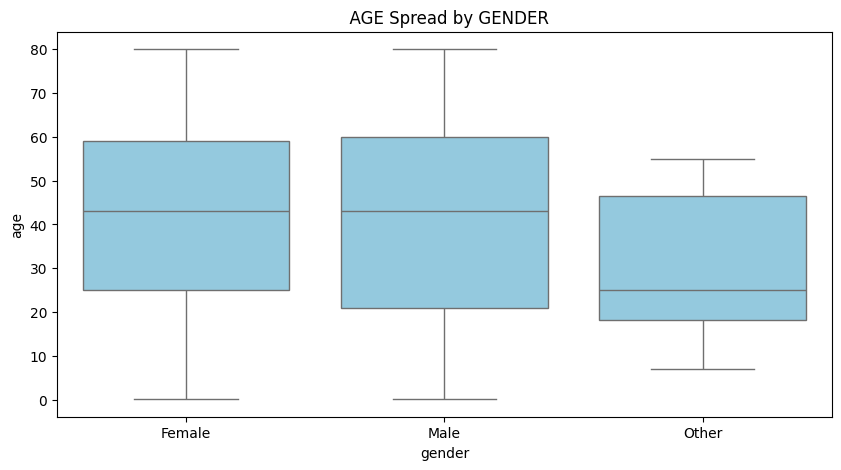

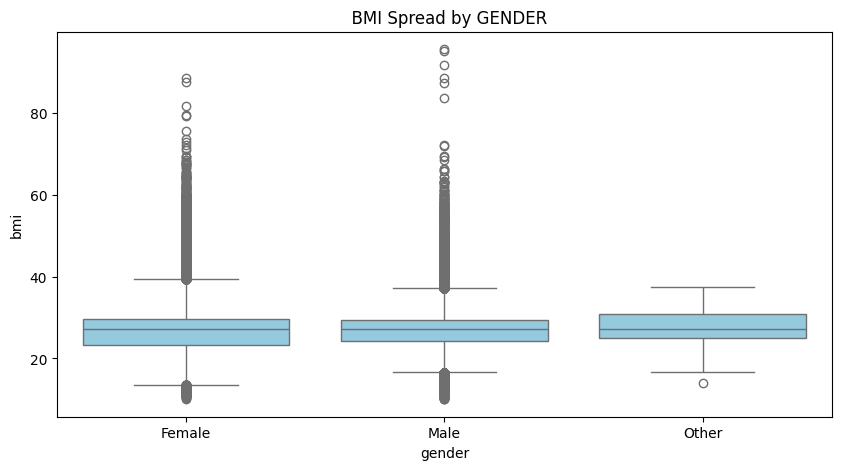

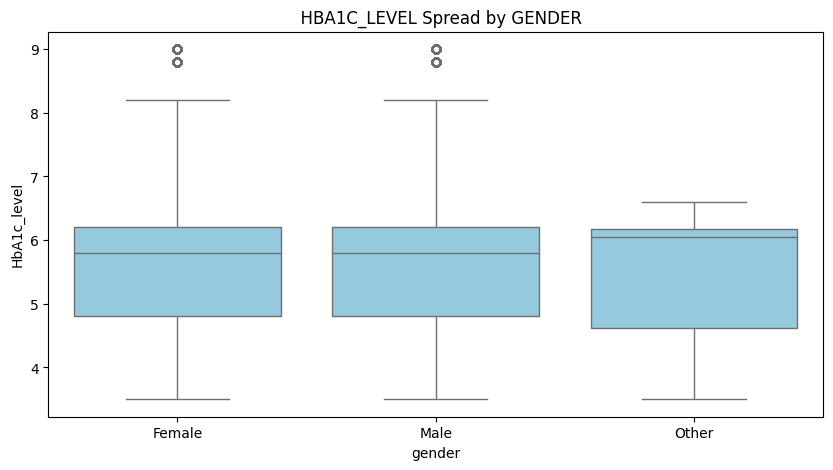

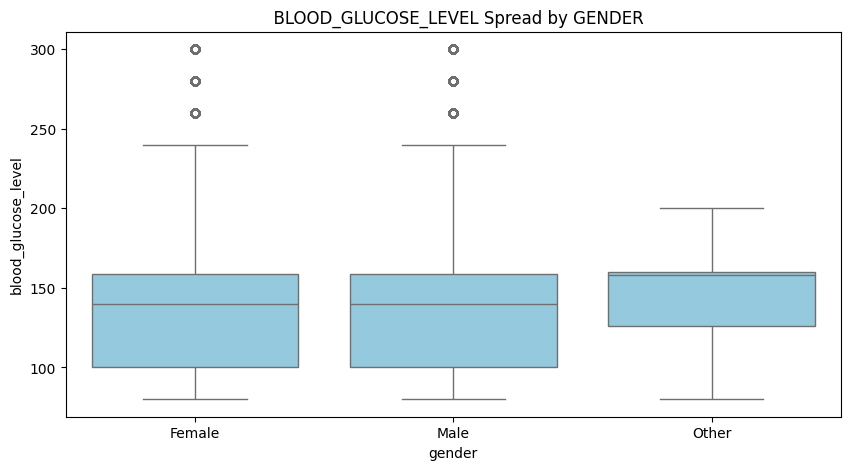

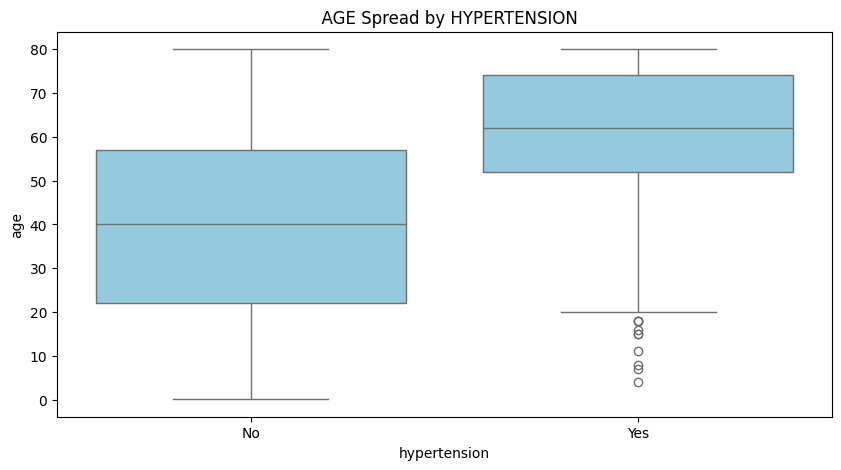

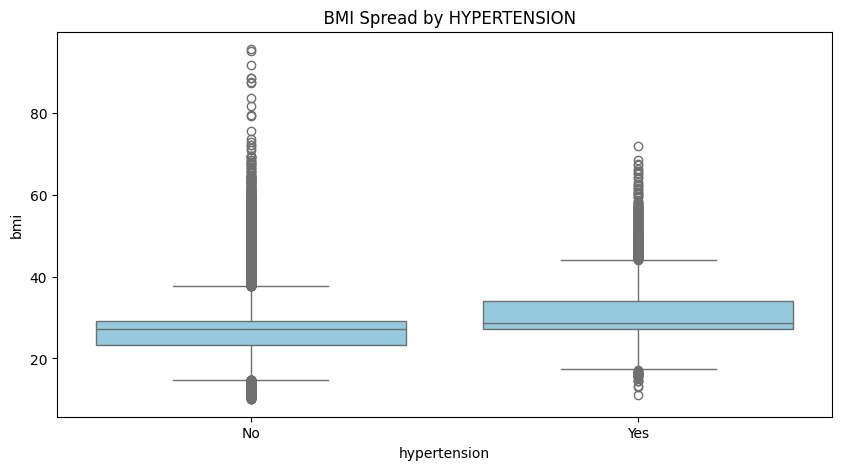

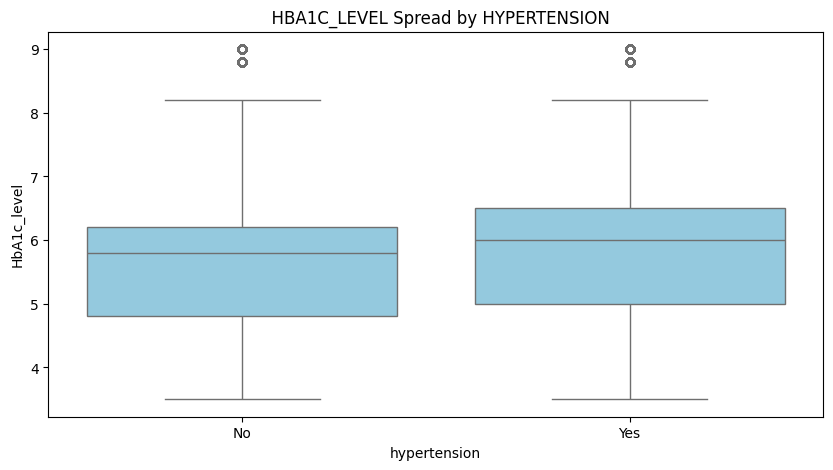

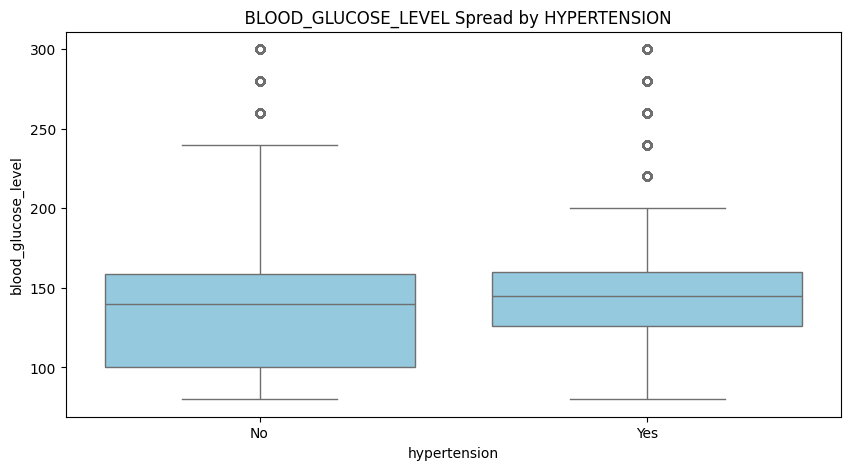

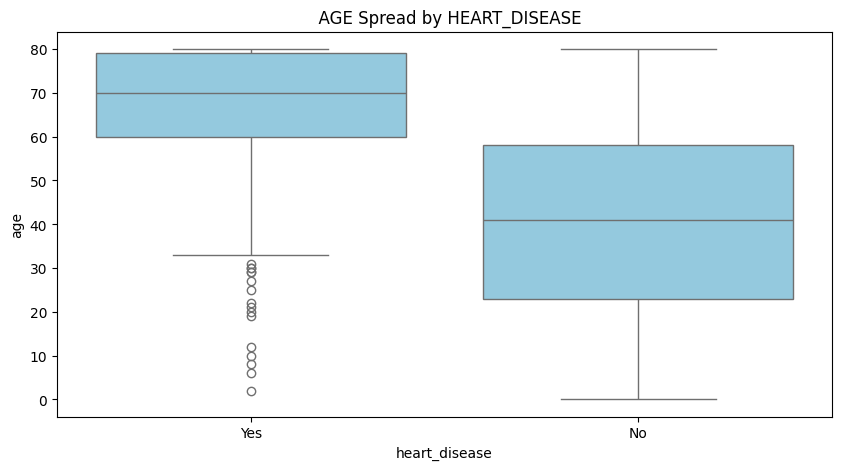

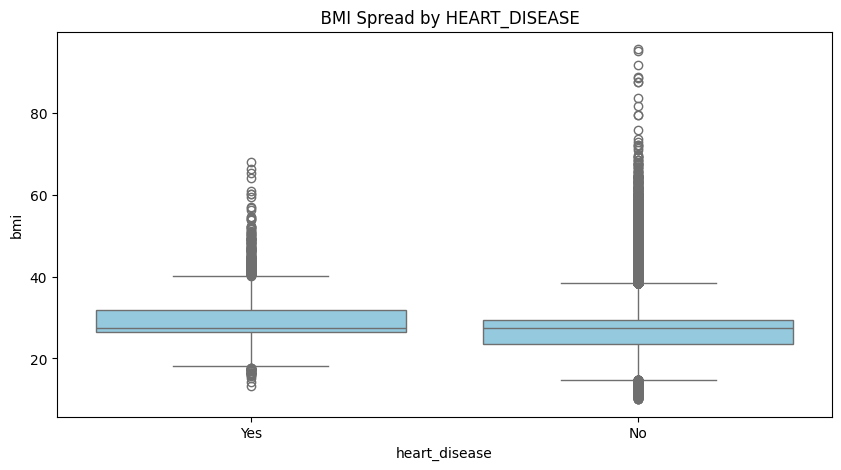

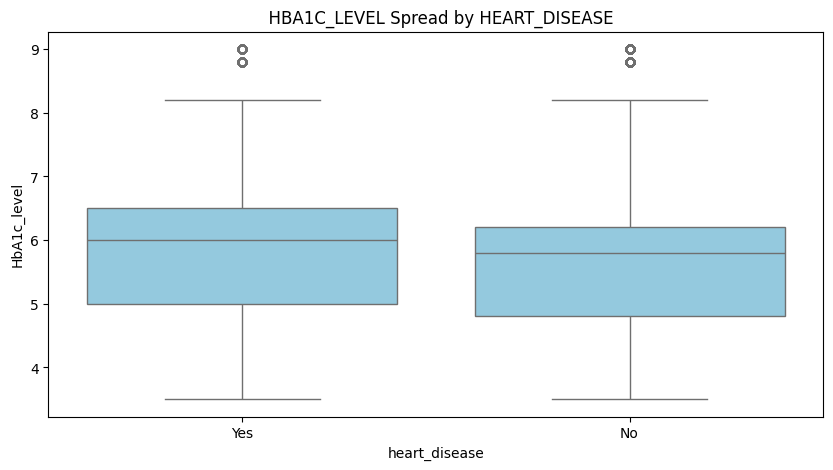

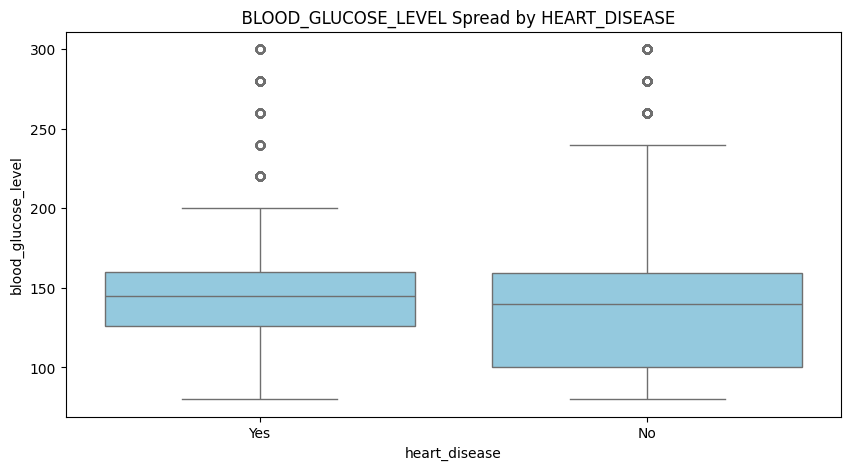

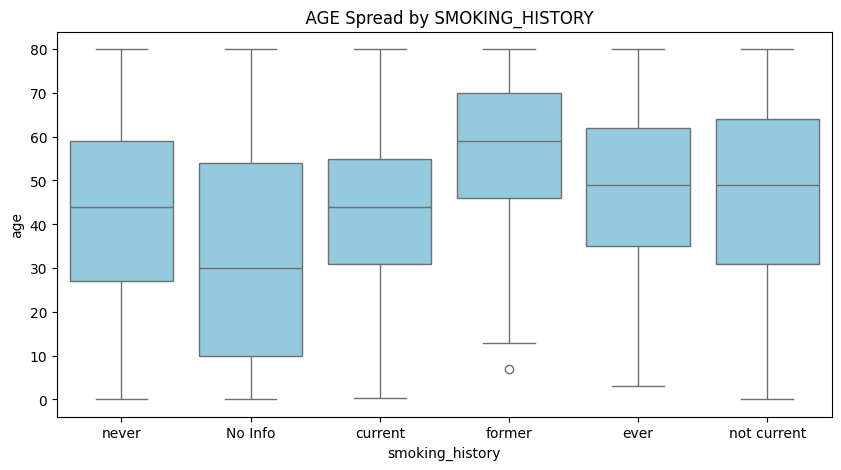

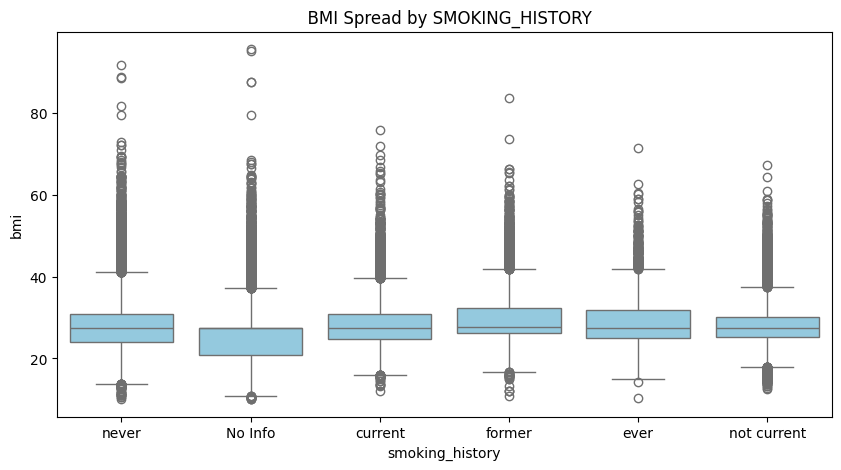

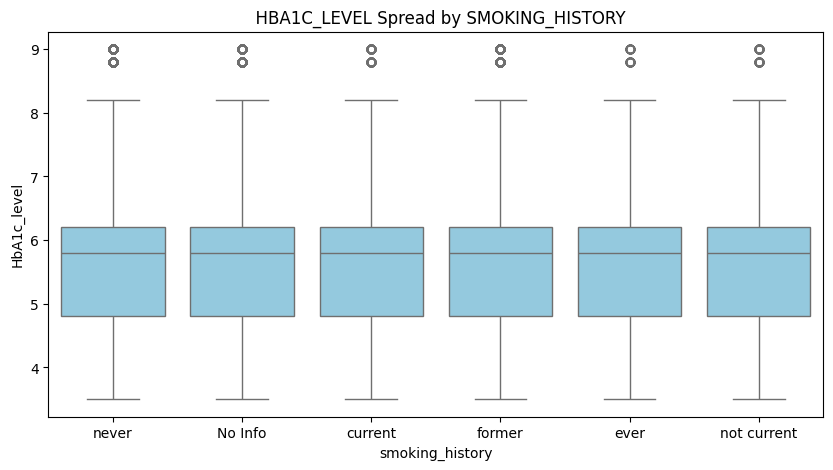

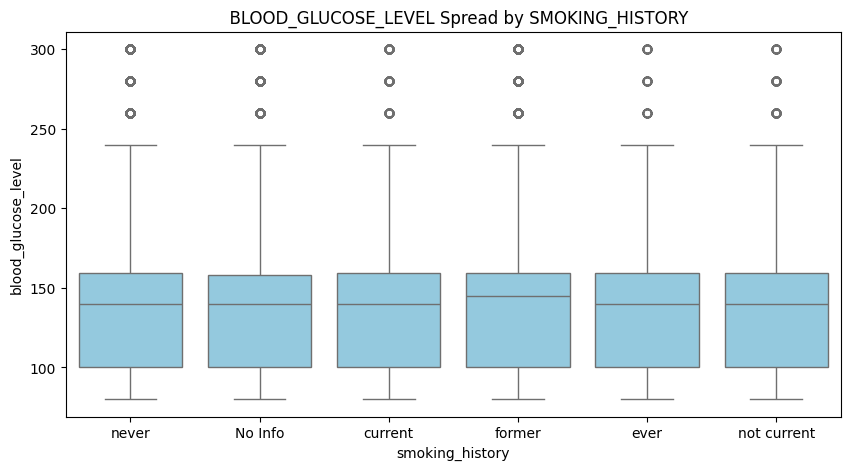

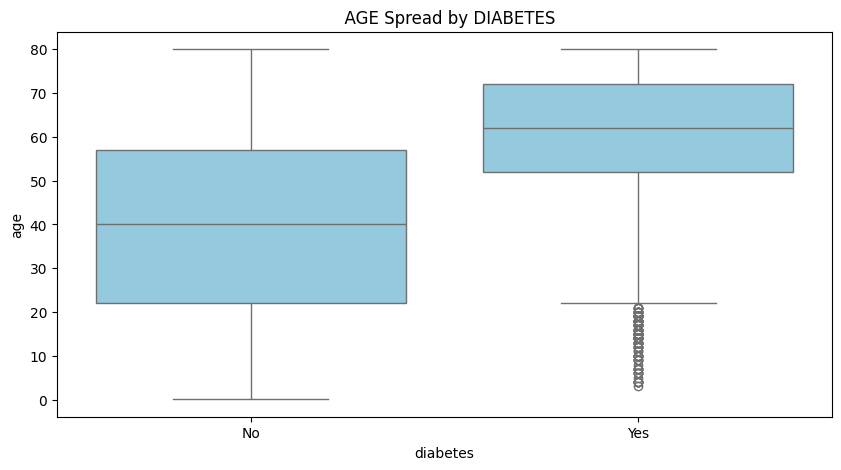

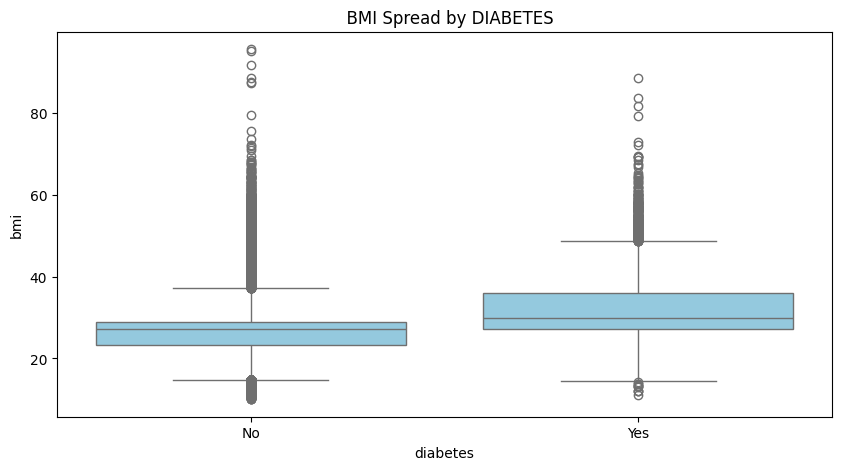

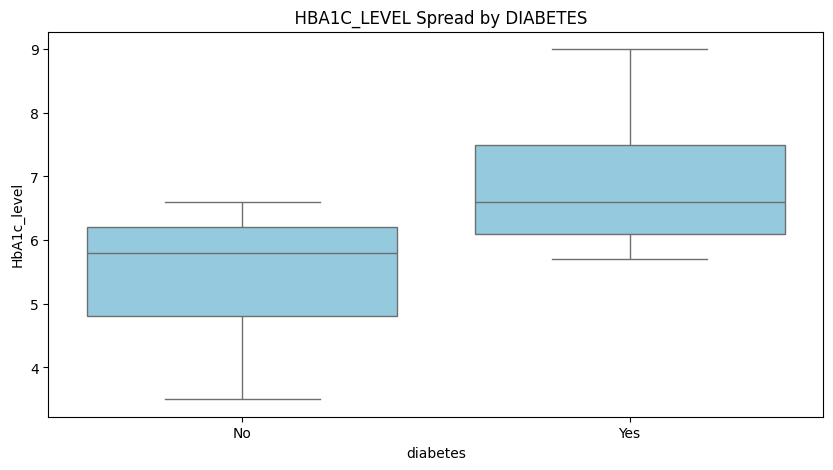

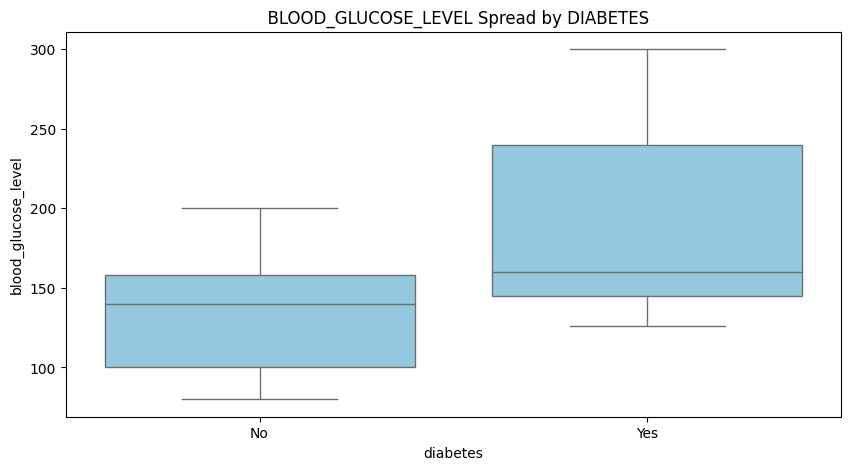

In [38]:
for cat_col in categorical_columns.columns:
    # if cat_col not in ['test_date', 'device_name', 'model']:
    for col in numeric_columns:
    
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=cat_col, y=col, color="skyblue")
        plt.title(f"  {col.upper()} Spread by {cat_col.upper()}")
        plt.show()


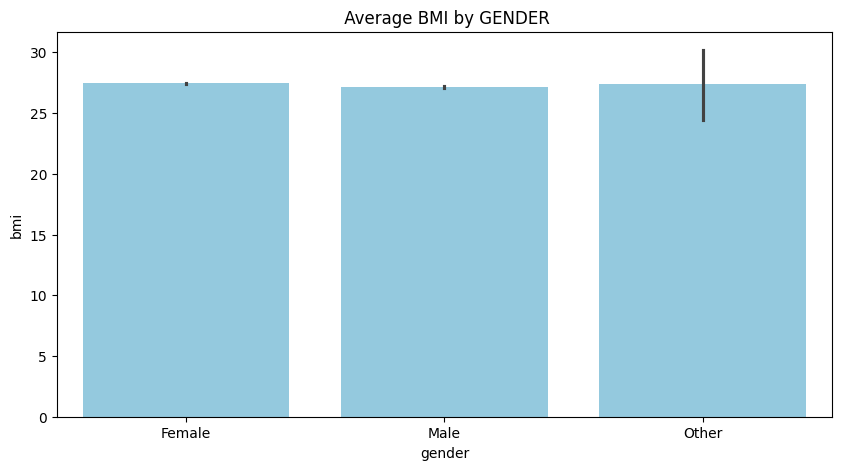

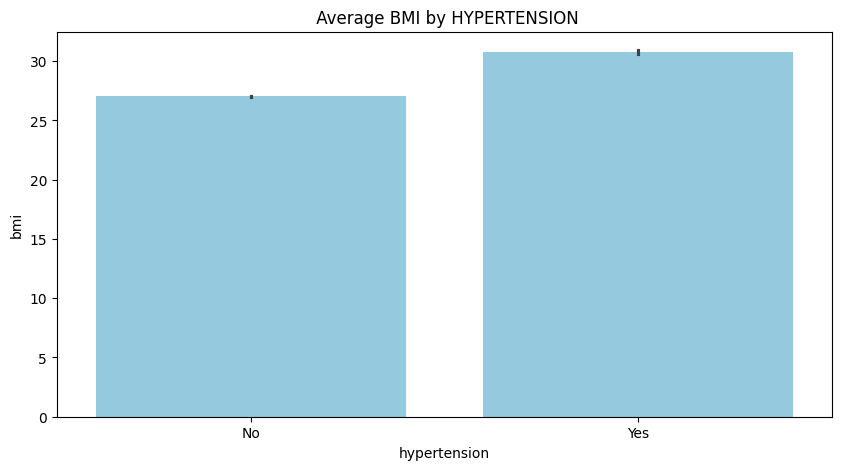

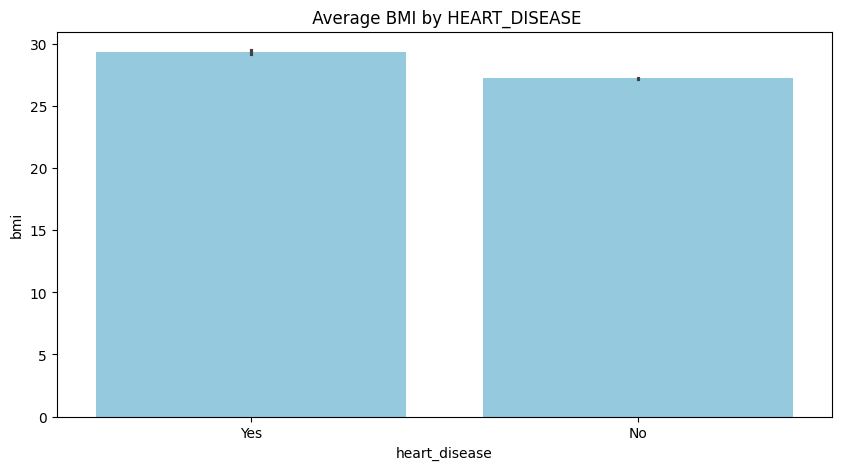

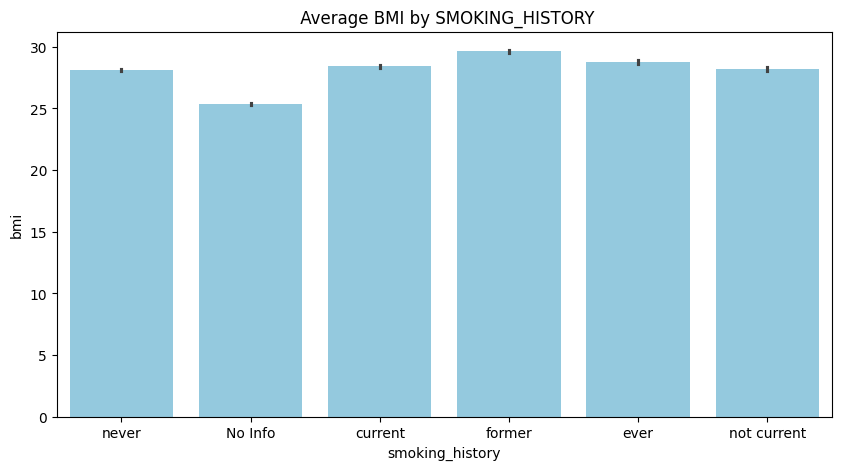

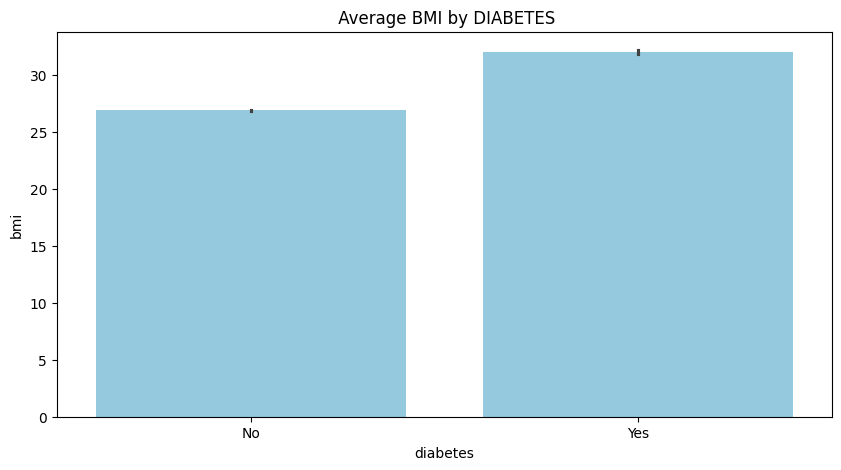

In [39]:
for col in categorical_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=col, y="bmi", color="skyblue")
    plt.title(f" Average BMI by {col.upper()}")
    plt.show()

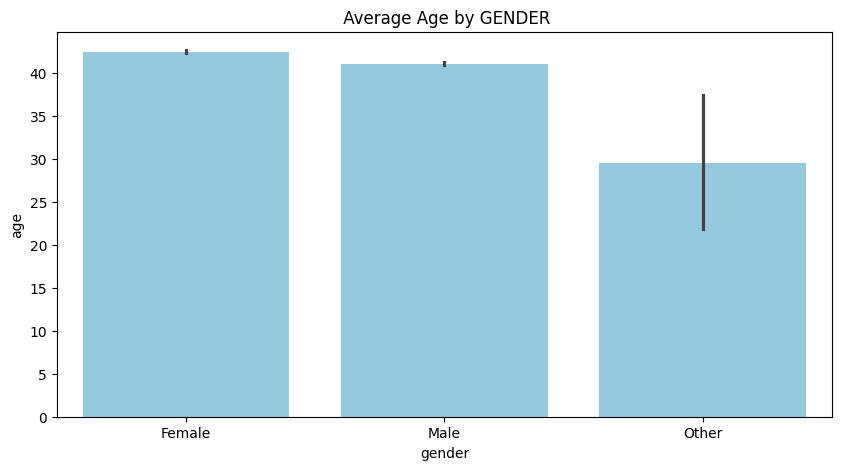

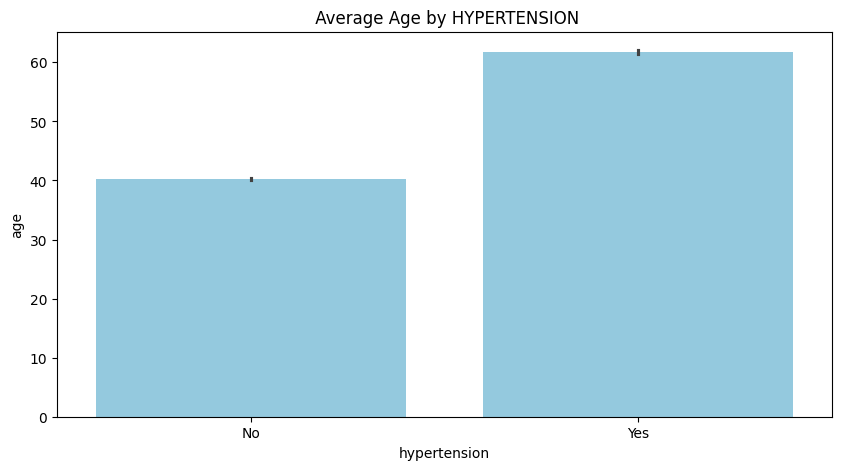

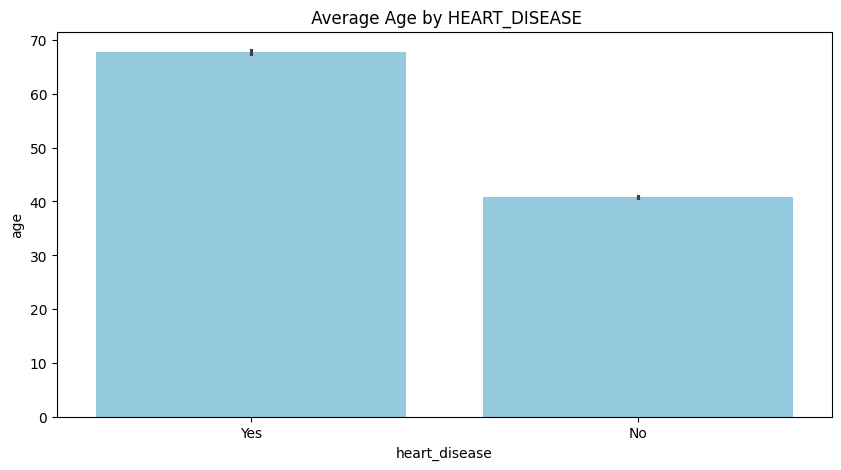

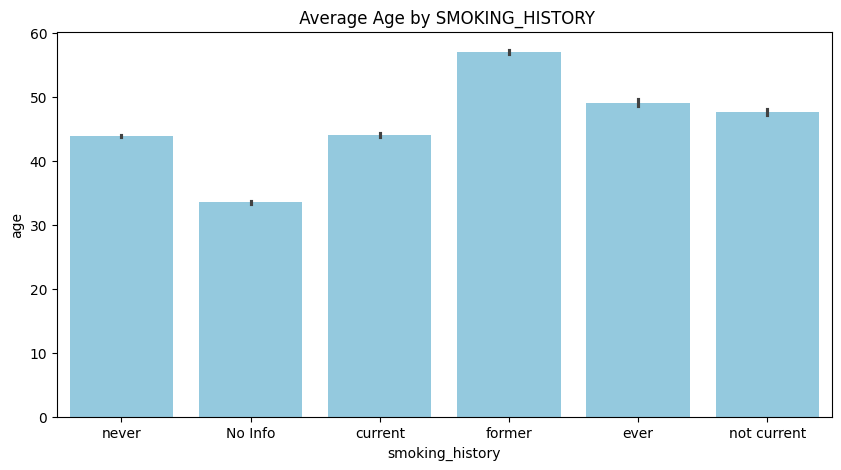

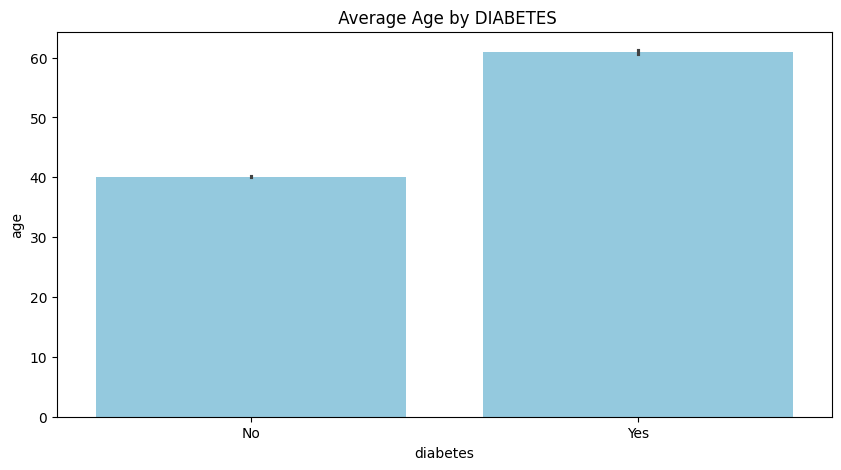

In [40]:
for col in categorical_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=col, y="age", color="skyblue")
    plt.title(f" Average Age by {col.upper()}")
    plt.show()

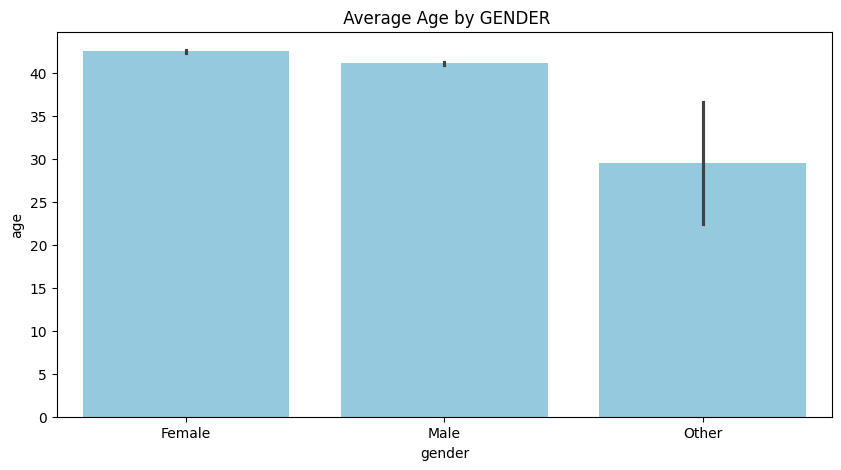

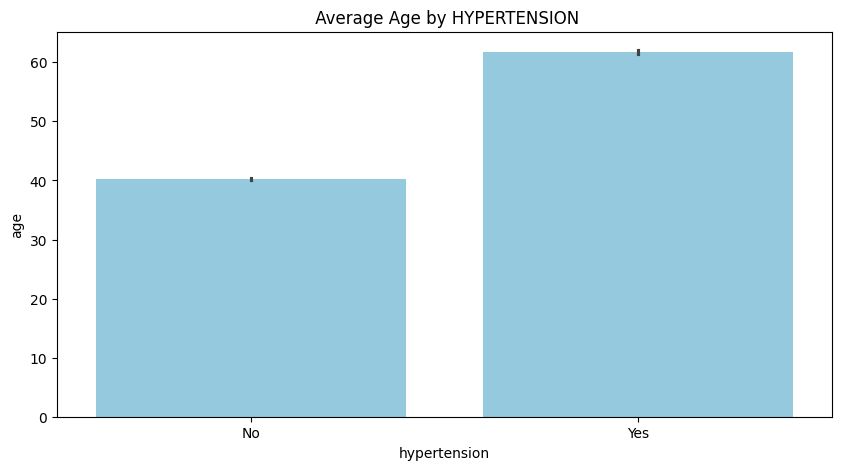

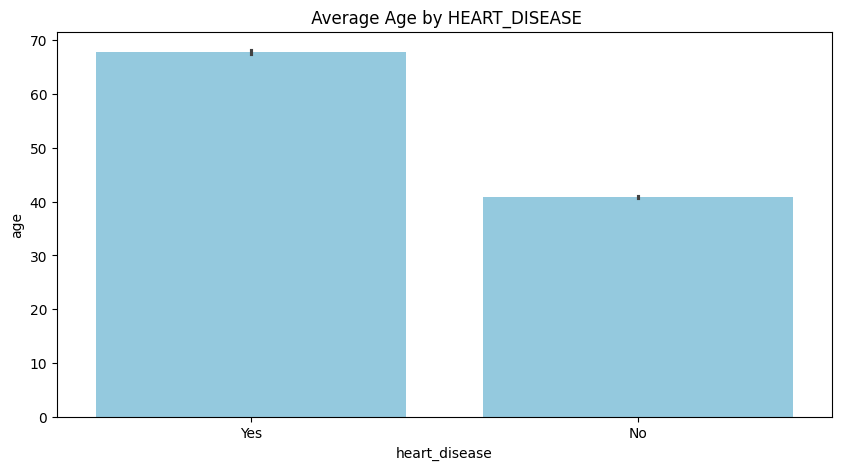

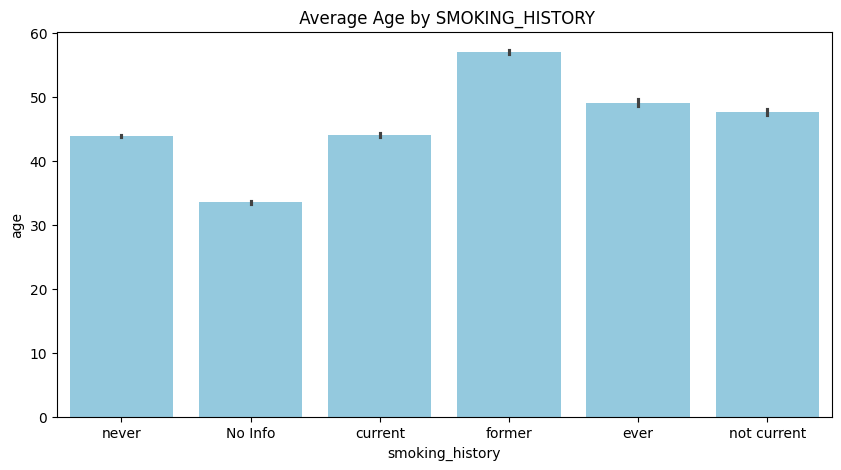

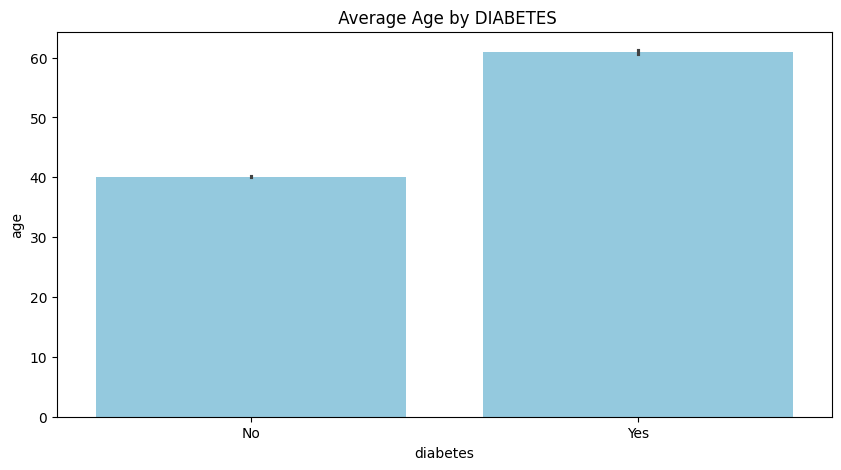

In [41]:
for col in categorical_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=col, y="age", color="skyblue")
    plt.title(f" Average Age by {col.upper()}")
    plt.show()

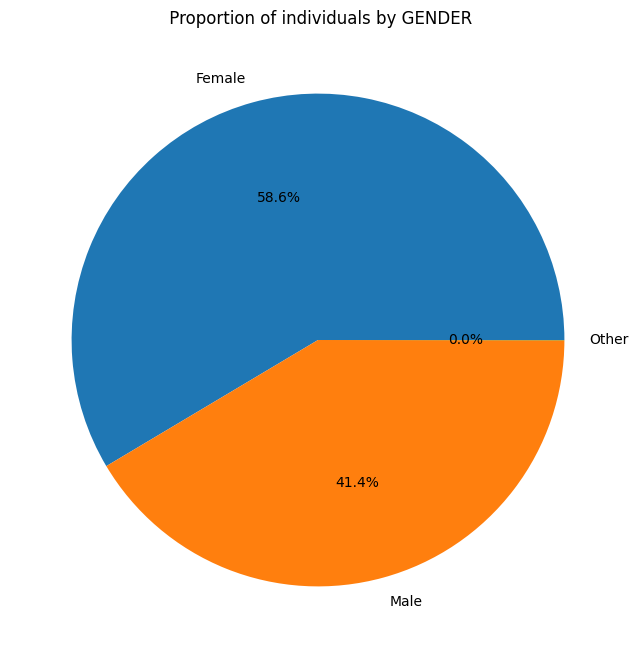

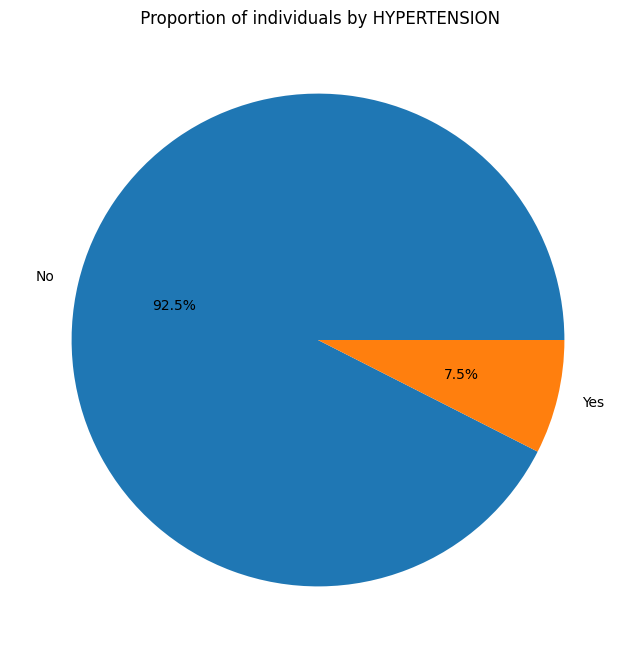

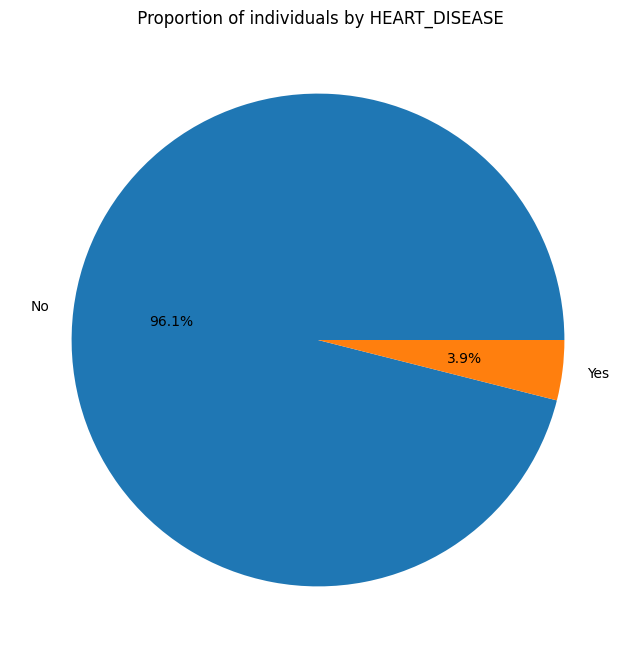

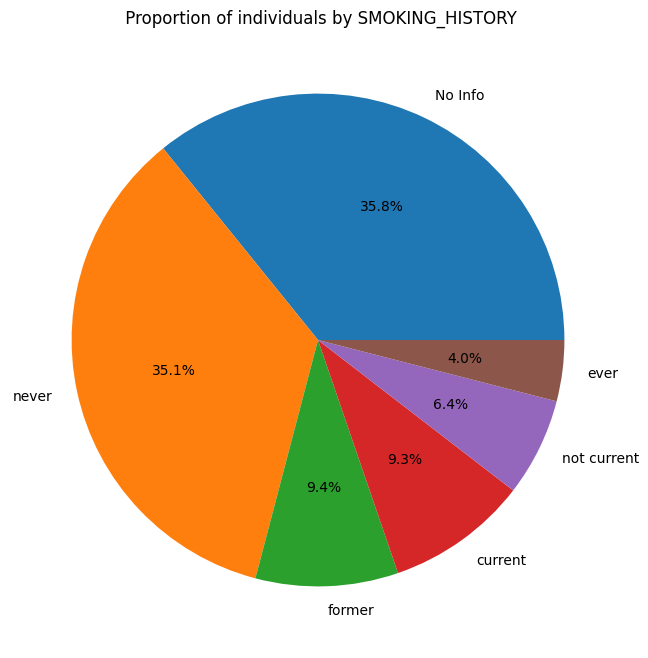

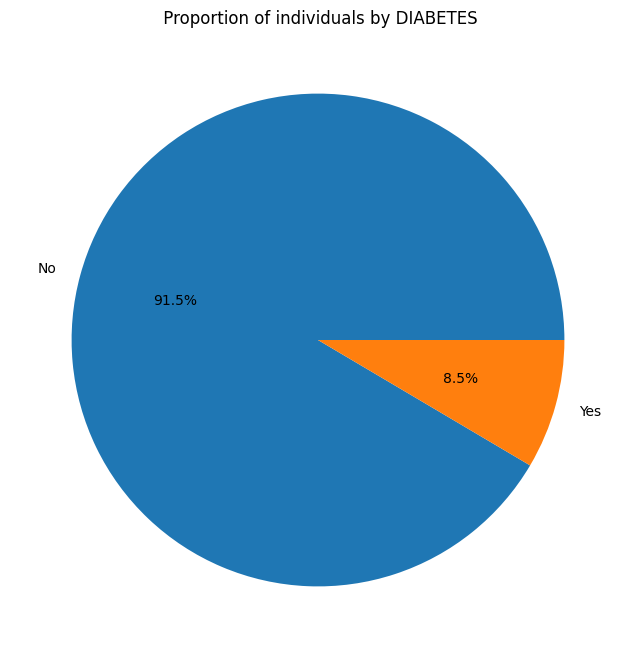

In [42]:
for col in categorical_columns.columns:

    subcat_count = df[col].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(subcat_count, labels=subcat_count.index, autopct='%1.1f%%')
    plt.title(f" Proportion of individuals by {col.upper()}")
    plt.show()

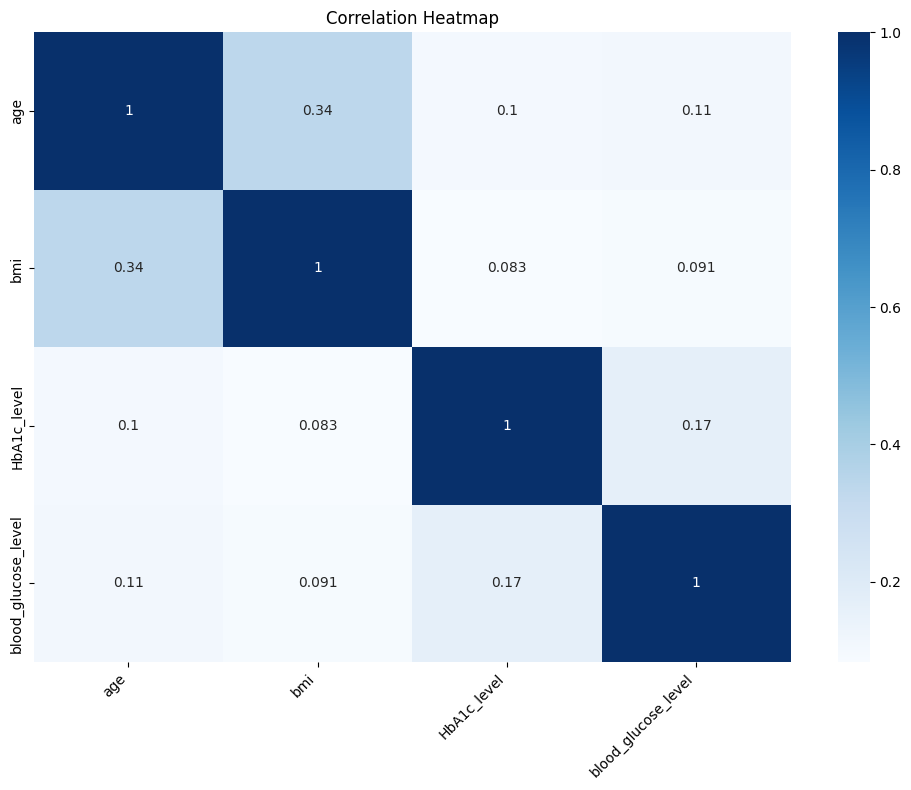

In [43]:
# Correlation heatmap
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

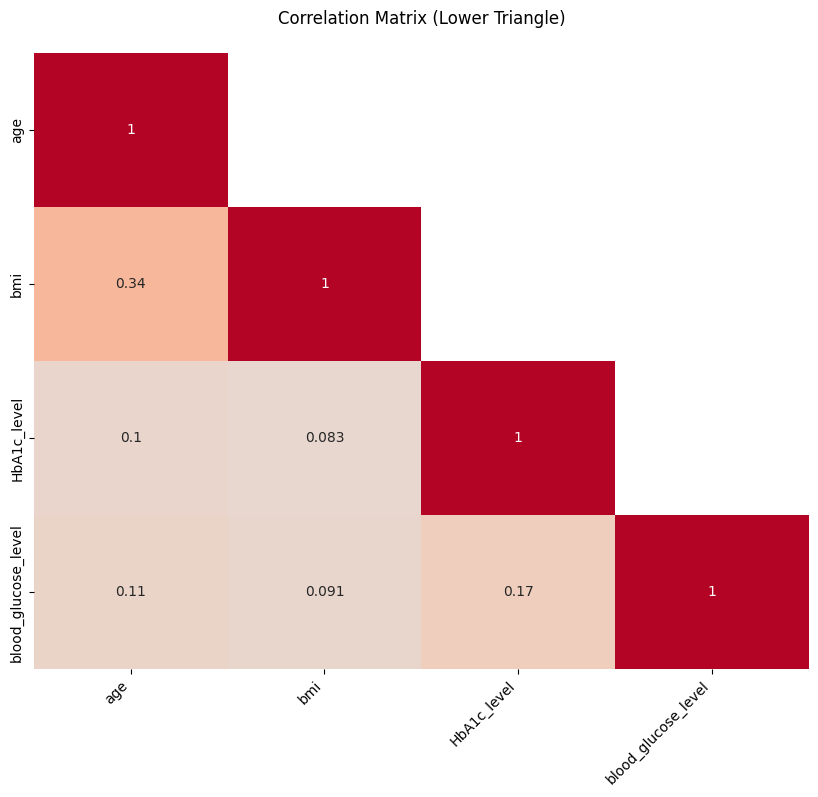

In [44]:
#
mask = np.triu(np.ones_like(corr_matrix), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    mask=mask,
    cbar=False,
)
plt.title("Correlation Matrix (Lower Triangle)\n")
plt.xticks(rotation=45, ha="right")
plt.show()

In [45]:
# g = sns.pairplot(data=df,
#                  hue='diabetes',
#                  diag_kind='auto',
#                  kind="scatter",
#                  palette='tab10', # Try 'husl', 'pastel', 'tab10', etc.
#                  height=5,)

# # Add grid to each inner plot
# for ax in g.axes.flatten():
#     if ax is not None:
#         ax.grid(True, linestyle='--', alpha=0.1)

# # Add title and spacing
# plt.suptitle('Pairwise Relationships by Segment', y=1.02)
# plt.tight_layout()
# plt.show()

In [46]:
# Monitor statistics before capping
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00


In [47]:
# Apply capping to handle extreme values (Review Lab 4)
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower, upper)
    return df

df = cap_outliers(df, 'bmi') # Cap the bmi column
df = cap_outliers(df, 'age') # Cap the bmi column
df = cap_outliers(df, 'blood_glucose_level') # Cap the bmi column

In [48]:
# Monitor the statistics after capping 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.890954,22.507525,1.08,24.00,43.00,60.00,80.0000
bmi,100000.0,27.276933,6.388760,14.60,23.63,27.32,29.58,48.7901
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.0000
blood_glucose_level,100000.0,137.923260,40.201620,80.00,100.00,140.00,159.00,280.0000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB


In [50]:
df[df["age"] < 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               0 non-null      object 
 1   age                  0 non-null      float64
 2   hypertension         0 non-null      object 
 3   heart_disease        0 non-null      object 
 4   smoking_history      0 non-null      object 
 5   bmi                  0 non-null      float64
 6   HbA1c_level          0 non-null      float64
 7   blood_glucose_level  0 non-null      int64  
 8   diabetes             0 non-null      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 0.0+ bytes


In [51]:
df[df["age"] < 1].head(60)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [52]:
df.iloc[150:160, :].info

<bound method DataFrame.info of      gender    age hypertension heart_disease smoking_history    bmi  \
150    Male  55.00           No            No         current  27.32   
151  Female  12.00           No            No         No Info  27.93   
152  Female  29.00           No            No           never  29.60   
153  Female  25.00           No            No         No Info  27.32   
154  Female  67.00           No            No           never  25.15   
155  Female   1.08           No            No         No Info  14.60   
156  Female  54.00           No            No            ever  26.72   
157  Female  33.00           No            No           never  41.24   
158  Female  68.00           No            No          former  34.87   
159  Female  38.00           No            No         No Info  23.96   

     HbA1c_level  blood_glucose_level diabetes  
150          6.0                   80       No  
151          5.7                  160       No  
152          5.7            

### Encoding Categorical Columns

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

# Identify column types
nominal_cols = ['gender', 'smoking_history']
binary_cols = ['hypertension', 'heart_disease', 'diabetes']

# Apply LabelEncoder to binary columns
# Dictionary to store the encoders for later use (e.g., during inference)
label_encoders = {}  

# Don't modify original
df_encoded = df.copy()  

for col in binary_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for reuse

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [54]:
# Set up OneHotEncoder for nominal categorical columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', 
                                 sparse_output=False), nominal_cols)
    ],
    # Leave binary + numeric columns unchanged
    remainder='passthrough'
)

In [55]:
X = df_encoded.drop(["diabetes"], axis=1)
y_encoded = df_encoded["diabetes"]

In [56]:
# Build final preprocessing pipeline 
preprocessing_pipeline = Pipeline(steps=[
    ('encoder', preprocessor)
])

# Fit the pipeline to the training data
preprocessing_pipeline.fit(X)

# Transform your dataset 
X_processed = preprocessing_pipeline.transform(X)

In [57]:
# Convert back to DataFrame with column names
# Get one-hot feature names

onehot = preprocessing_pipeline.named_steps['encoder'].named_transformers_['onehot']
onehot_feature_names = onehot.get_feature_names_out(nominal_cols)
print("\nOne Hot Feature Names:", onehot_feature_names)


# Get remaining columns (binary + numeric)
remaining_cols = [col for col in X.columns if col not in nominal_cols]
print(f"\nRemaining Columns: {remaining_cols}")


One Hot Feature Names: ['gender_Female' 'gender_Male' 'gender_Other' 'smoking_history_No Info'
 'smoking_history_current' 'smoking_history_ever' 'smoking_history_former'
 'smoking_history_never' 'smoking_history_not current']

Remaining Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [58]:
remaining_cols

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [59]:
# Combine names
final_columns = list(onehot_feature_names) + remaining_cols

# Create final DataFrame
X_final = pd.DataFrame(X_processed, columns=final_columns)
X_final.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,27.32,5.7,158.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,1.0,1.0,20.14,4.8,155.0


In [60]:

# import joblib
# joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.pkl')

# # Save label encoders (you can also pickle this)
# joblib.dump(label_encoders, 'label_encoders.pkl')

In [61]:
X_final

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,27.32,5.7,158.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,1.0,1.0,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,27.32,6.2,90.0
99996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,17.37,6.5,100.0
99997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,0.0,0.0,27.83,5.7,155.0
99998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0.0,0.0,35.42,4.0,100.0


In [62]:
X_final[["age", "bmi", "HbA1c_level", "HbA1c_level"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.890954,22.507525,1.08,24.00,43.00,60.00,80.0000
bmi,100000.0,27.276933,6.388760,14.60,23.63,27.32,29.58,48.7901
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.0000
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.0000


In [63]:
# # Separating predictors from target
# X = df_final.drop(["diabetes"], axis=1)
# y = df_final["diabetes"]

In [64]:
# Train-test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.1, random_state=42, stratify=y_encoded)

In [65]:
print(X_train.shape, y_train.shape)

(90000, 15) (90000,)


In [66]:
print(X_test.shape, y_test.shape)

(10000, 15) (10000,)


In [67]:
X_train.columns

Index(['gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current', 'age',
       'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

In [68]:
['gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current', 
       'hypertension', 'heart_disease', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level']

['gender_Female',
 'gender_Male',
 'gender_Other',
 'smoking_history_No Info',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current',
 'hypertension',
 'heart_disease',
 'age',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [69]:
# Apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
X_train[scaled_columns]= scaler.fit_transform(X_train[scaled_columns])
X_test[scaled_columns]= scaler.transform(X_test[scaled_columns])

In [70]:
X_train.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
25481,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.182196,0.0,0.0,0.752533,0.534938,0.525217
55623,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.115330,0.0,1.0,0.312803,1.188702,-0.296216
73533,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.182196,0.0,0.0,-0.250551,0.908517,-1.192325
320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.048891,0.0,0.0,1.905844,0.254754,1.545786
13641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.692985,0.0,0.0,-0.749745,-1.426352,-1.441244


In [71]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

### Model Evaluation

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    ConfusionMatrixDisplay
)

In [73]:
# Evaluate model
y_pred = model.predict(X_test)

In [74]:
y_pred[:34]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [75]:
y_pred[:34]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Basic Confusion Matrix (no plot)

In [76]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (raw values):\n", cm)

Confusion Matrix (raw values):
 [[9066   84]
 [ 296  554]]


In [77]:
# Extract individual elements from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 9066
False Positives (FP): 84
False Negatives (FN): 296
True Positives (TP): 554


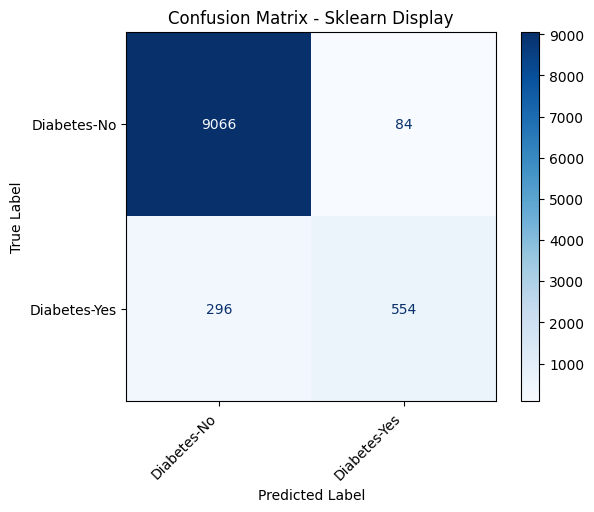

In [78]:
# Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Diabetes-No", "Diabetes-Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Sklearn Display")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

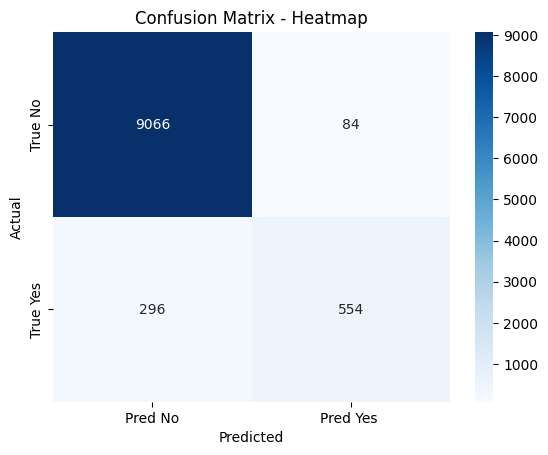

In [79]:
# Confusion Matrix using Seaborn Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred No', 'Pred Yes '], 
            yticklabels=['True No', 'True Yes'])

plt.title("Confusion Matrix - Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [80]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Diabetes - No", "Diabetes - Yes"]))

Classification Report:

                precision    recall  f1-score   support

 Diabetes - No       0.97      0.99      0.98      9150
Diabetes - Yes       0.87      0.65      0.74       850

      accuracy                           0.96     10000
     macro avg       0.92      0.82      0.86     10000
  weighted avg       0.96      0.96      0.96     10000



In [81]:
# Core Metrics
# Compute probabilities for ROC and PR curves
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Derived metrics
tpr = tp / (tp + fn)  # True Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))
print("TPR      :", round(tpr, 4))
print("FNR      :", round(fnr, 4))

Accuracy : 0.962
Precision: 0.8683
Recall   : 0.6518
F1 Score : 0.7446
TPR      : 0.6518
FNR      : 0.3482


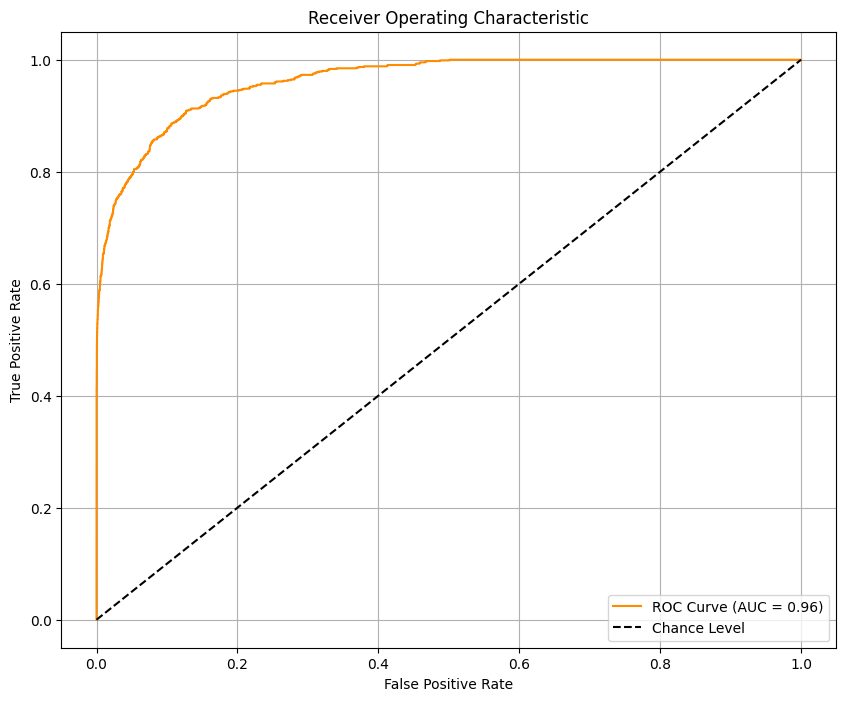

In [82]:
# ROC Curve
fpr, tpr_curve, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr_curve, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid(True)
plt.show()

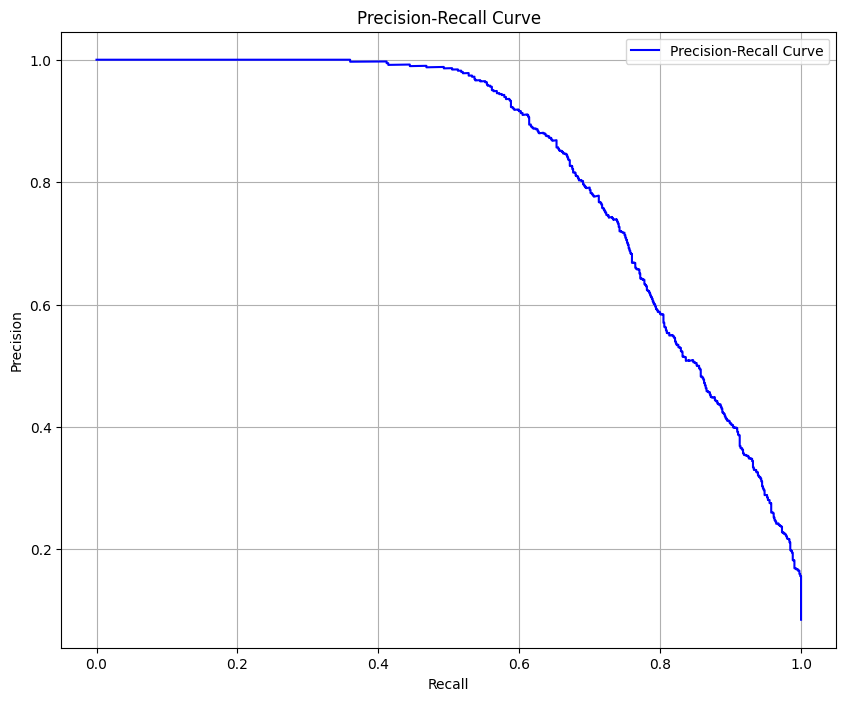

In [83]:
# Precision-Recall Curve
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 8))
plt.plot(recall_vals, precision_vals, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
import os
import joblib

# Directory name
model_dir = 'models_files'

# Create directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save everything for deployment, you will need this in Lab 9
# Save model and preprocessing objects
joblib.dump(model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(preprocessor, os.path.join(model_dir, 'onehot_preprocessor.pkl'))
joblib.dump(label_encoders, os.path.join(model_dir, 'label_encoders.pkl'))
joblib.dump(scaler, os.path.join(model_dir, 'scaler.pkl'))

print("Model and encoders saved successfully.")


Model and encoders saved successfully.


# bmi= 28, gender = Male, smoking_history = current, hypertension=Yes, heart_disease=Yes, glucose level = 140, age = 45, HbA1c_level=7,  blood_glucose_level=195

### Make predictions for a single instance

In [85]:
# Create the Input Instance

# create dataframe using data given
data = {
    'gender': ['Male'],
    'smoking_history': ['current'],
    'hypertension': ['Yes'],
    'heart_disease': ['Yes'],
    # 'glucose_level': [140],
    'bmi': [28],
    'age': [45],
    'HbA1c_level': [7],
    'blood_glucose_level': [195]
}

df_input = pd.DataFrame(data)
df_input

,gender,smoking_history,hypertension,heart_disease,bmi,age,HbA1c_level,blood_glucose_level
0,Male,current,Yes,Yes,28,45,7,195


In [86]:
# Load components (Saved Model, Encoders and Scalers)
model = joblib.load('models_files/logistic_regression_model.pkl')
preprocessor = joblib.load('models_files/onehot_preprocessor.pkl')
label_encoders = joblib.load('models_files/label_encoders.pkl')
scaler = joblib.load('models_files/scaler.pkl')

In [87]:
# Apply LabelEncoder to Binary Columns
# diabetes may not exist in input if it's not part of features
binary_cols = ['hypertension', 'heart_disease']  
available_binary_cols = [col for col in binary_cols if col in df_input.columns]

# Apply saved LabelEncoders
for col in available_binary_cols:
    df_input[col] = label_encoders[col].transform(df_input[col])

In [88]:
# Apply the same OneHotEncoder from training
X_processed = preprocessor.transform(df_input)

In [89]:
# Predict class
pred_class = model.predict(X_processed)[0]
pred_class

/home/agbor/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [90]:
# Predict probability
pred_proba = model.predict_proba(X_processed)[0][1]  # probability of class 1

prediction_message = (
    "Yes (Likely to Have Diabetes)" if pred_class == 1 else "No (Unlikely to Have Diabetes)"
)
print(f"Predicted Class              : {prediction_message}")
print(f"Probability of Diabetes (1)  : {(pred_proba*100):.2f}%")

Predicted Class              : Yes (Likely to Have Diabetes)
Probability of Diabetes (1)  : 100.00%


/home/agbor/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
